# Introduction

FauzanPutra Sanjaya
2306275424

# Import Library dan Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import re
from datetime import datetime
from scipy.stats import zscore

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/dunnowhoo/UFC-Event-Data/refs/heads/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dunnowhoo/UFC-Event-Data/refs/heads/main/test.csv')

In [ ]:
count = train['PPV-Sales'].isnull().sum()
total = train['PPV-Sales'].sum()
result = (count/total) * 100
print(result)

0.0003025916461626635


In [ ]:
test.head()

,id,Date,Event-Code,Event-Name,Full Name,Fighter-2-Name,Details,Judge-1-Name,Judge-2-Name,Judge-3-Name,Referee,Belt,Women's-Bout,Interim-Bout,Superfight,Fighter-Active-Status,Fight-City,Fight-State,Fight-Country,Height,Weight,Reach,Stance,Date of Birth,Weight-Division
0,0,2021-03-06 00:00:00,6e2b1d631832921d,UFC 259: Blachowicz vs. Adesanya,Aalon Cruz,Uros Medic,Punches to Head On Ground,NaN,NaN,NaN,Mark Smith,0,0,0,0,0,Las Vegas,Nevada,USA,"6' 0""",145.0,78.0,Switch,1989-09-20 00:00:00,Lightweight
1,1,2020-02-29 00:00:00,fc9a9559a05f2704,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Punches to Head From Mount,NaN,NaN,NaN,Scott Howard,0,0,0,0,0,Norfolk,Virginia,USA,"6' 0""",145.0,78.0,Switch,1989-09-20 00:00:00,Featherweight
2,4,2020-07-15 00:00:00,18f5669a92e99d92,UFC Fight Night: Kattar vs. Ige,Aaron Phillips,Jack Shore,Rear Naked Choke,NaN,NaN,NaN,Herb Dean,0,0,0,0,1,Abu Dhabi,Abu Dhabi,United Arab Emirates,"5' 9""",135.0,71.0,Southpaw,1989-08-05 00:00:00,Bantamweight
3,30,2018-01-20 00:00:00,02177caefe7c07d4,UFC 220: Miocic vs. Ngannou,Abdul Razak Alhassan,Sabah Homasi,NaN,NaN,NaN,NaN,Steve Rita,0,0,0,0,1,Boston,Massachusetts,USA,"5' 10""",170.0,73.0,Orthodox,1985-08-11 00:00:00,Welterweight
4,31,2020-07-15 00:00:00,18f5669a92e99d92,UFC Fight Night: Kattar vs. Ige,Abdul Razak Alhassan,Mounir Lazzez,NaN,Ben Cartlidge,Clemens Werner,Vito Paolillo,Daniel Movahedi,0,0,0,0,1,Abu Dhabi,Abu Dhabi,United Arab Emirates,"5' 10""",170.0,73.0,Orthodox,1985-08-11 00:00:00,Welterweight


In [ ]:
for col in test.columns:
  print(col)

id
Date
Event-Code
Event-Name
Full Name
Fighter-2-Name
Details
Judge-1-Name
Judge-2-Name
Judge-3-Name
Referee
Belt
Women's-Bout
Interim-Bout
Superfight
Fighter-Active-Status
Fight-City
Fight-State
Fight-Country
Height
Weight
Reach
Stance
Date of Birth
Weight-Division


# Exploratory Data Analysis (EDA)

In [ ]:
train.head()

,id,Date,Event-Code,Event-Name,Full Name,Fighter-2-Name,Details,Judge-1-Name,Judge-1-Score,Judge-2-Name,Judge-2-Score,Judge-3-Name,Judge-3-Score,Finish-Time,Finish-Round,Total-Rounds,Total-Fight-Time-Sec,Referee,Belt,Women's-Bout,Interim-Bout,Superfight,Fight-Bonus,Performance-Bonus,KO-Bonus,Submission-Bonus,Knockdowns,Significant-Strike-Land,Significant-Strike-Attempt,Significant-Strike-Percent,Total-Strikes-Land,Total-Strikes-Attempt,Takedown-Success,Takedown-Land,Takedown-Percent,Submission-Attempt,Submission-Reverse,Control-Time-Sec,Head-Land,Head-Attempt,Body-Land,Body-Attempt,Leg-Land,Leg-Attempt,Distance-Land,Distance-Attempt,Clinch-Land,Clinch-Attempt,Ground-Land,Ground-Attempt,Fighter-Active-Status,Fight-City,Fight-State,Fight-Country,PPV-Sales,Height,Weight,Reach,Stance,Date of Birth,Round-1-Knockdown,Round-1-Significant-Strikes,Round-1-Significant-Strikes-Percent,Round-1-Total-Strikes,Round-1-Takedowns,Round-1-Takedown-Percent,Round-1-Submission-Attempt,Round-1-Submission-Reverse,Round-1-Control-Time,Round-1-Head,Round-1-Body,Round-1-Leg,Round-1-Distance,Round-1-Clinch,Round-1-Ground,Round-2-Knockdown,Round-2-Significant-Strikes,Round-2-Significant-Strikes-Percent,Round-2-Total-Strikes,Round-2-Takedowns,Round-2-Takedown-Percent,Round-2-Submission-Attempt,Round-2-Submission-Reverse,Round-2-Control-Time,Round-2-Head,Round-2-Body,Round-2-Leg,Round-2-Distance,Round-2-Clinch,Round-2-Ground,Round-3-Knockdown,Round-3-Significant-Strikes,Round-3-Significant-Strikes-Percent,Round-3-Total-Strikes,Round-3-Takedowns,Round-3-Takedown-Percent,Round-3-Submission-Attempt,Round-3-Submission-Reverse,Round-3-Control-Time,Round-3-Head,Round-3-Body,Round-3-Leg,Round-3-Distance,Round-3-Clinch,Round-3-Ground,Round-4-Knockdown,Round-4-Significant-Strikes,Round-4-Significant-Strikes-Percent,Round-4-Total-Strikes,Round-4-Takedowns,Round-4-Takedown-Percent,Round-4-Submission-Attempt,Round-4-Submission-Reverse,Round-4-Control-Time,Round-4-Head,Round-4-Body,Round-4-Leg,Round-4-Distance,Round-4-Clinch,Round-4-Ground,Round-5-Knockdown,Round-5-Significant-Strikes,Round-5-Significant-Strikes-Percent,Round-5-Total-Strikes,Round-5-Takedowns,Round-5-Takedown-Percent,Round-5-Submission-Attempt,Round-5-Submission-Reverse,Round-5-Control-Time,Round-5-Head,Round-5-Body,Round-5-Leg,Round-5-Distance,Round-5-Clinch,Round-5-Ground,Result,Weight-Division,Win-Method
0,2,2000-11-17 00:00:00,da6dfd09cca1d705,UFC 28: High Stakes,Aaron Brink,Andrei Arlovski,Armbar On Ground,NaN,NaN,NaN,NaN,NaN,NaN,0:55,1,3,55,John McCarthy,0,0,0,0,0,0,0,0,0,0,5,0.0,0,5,0,1,0.0,0,0,4,0,5,0,0,0,0,0,3,0,2,0,0,0,Atlantic City,New Jersey,USA,NaN,"6' 3""",205.0,NaN,Orthodox,1974-11-12 00:00:00,0,0 of 5,0,0 of 5,0 of 1,0,0,0,0:04,0 of 5,0 of 0,0 of 0,0 of 3,0 of 2,0 of 0,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,Heavyweight,Submission
1,3,2014-08-23 00:00:00,063649e21bc9d6d5,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,NaN,Derek Cleary,28 - 29,Bobby Higdon,28 - 29,Jim Lambert,28 - 29,5:00,3,3,900,Kevin Nix,0,0,0,0,0,0,0,0,0,38,54,70.0,230,279,0,1,0.0,0,0,0,23,39,12,12,3,3,14,25,17,18,7,11,1,Tulsa,Oklahoma,USA,NaN,"5' 9""",135.0,71.0,Southpaw,1989-08-05 00:00:00,0,9 of 16,56,83 of 106,0 of 0,0,0,0,0:00,6 of 13,1 of 1,2 of 2,2 of 6,1 of 1,6 of 9,0,22 of 27,81,64 of 73,0 of 1,0,0,0,0:00,14 of 19,7 of 7,1 of 1,11 of 15,10 of 10,1 of 2,0,7 of 11,63,83 of 100,0 of 0,0,0,0,0:00,3 of 7,4 of 4,0 of 0,1 of 4,6 of 7,0 of 0,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,Bantamweight,Decision - Unanimous
2,5,2014-05-24 00:00:00,9ca265dfe8323db3,UFC 173: Barao vs Dillashaw,Aaron Phillips,Sam Sicilia,NaN,Adalaide Byrd,28 - 29,Glenn Trowbridge,28 - 29,Derek Cleary,27 - 30,5:00,3,3,900,Jason Herzog,0,0,0,0,0,0,0,0,0,18,40,45.0,109,137,0,0,NaN,1,1,68,5,23,12,14,1,3,9,26,3,6,

In [ ]:
for col in train.columns:
  print(col)

id
Date
Event-Code
Event-Name
Full Name
Fighter-2-Name
Details
Judge-1-Name
Judge-1-Score
Judge-2-Name
Judge-2-Score
Judge-3-Name
Judge-3-Score
Finish-Time
Finish-Round
Total-Rounds
Total-Fight-Time-Sec
Referee
Belt
Women's-Bout
Interim-Bout
Superfight
Fight-Bonus
Performance-Bonus
KO-Bonus
Submission-Bonus
Knockdowns
Significant-Strike-Land
Significant-Strike-Attempt
Significant-Strike-Percent
Total-Strikes-Land
Total-Strikes-Attempt
Takedown-Success
Takedown-Land
Takedown-Percent
Submission-Attempt
Submission-Reverse
Control-Time-Sec
Head-Land
Head-Attempt
Body-Land
Body-Attempt
Leg-Land
Leg-Attempt
Distance-Land
Distance-Attempt
Clinch-Land
Clinch-Attempt
Ground-Land
Ground-Attempt
Fighter-Active-Status
Fight-City
Fight-State
Fight-Country
PPV-Sales
Height
Weight
Reach
Stance
Date of Birth
Round-1-Knockdown
Round-1-Significant-Strikes
Round-1-Significant-Strikes-Percent
Round-1-Total-Strikes
Round-1-Takedowns
Round-1-Takedown-Percent
Round-1-Submission-Attempt
Round-1-Submission-Rev

In [ ]:
train.info

<bound method DataFrame.info of          id                 Date        Event-Code  \
0         2  2000-11-17 00:00:00  da6dfd09cca1d705   
1         3  2014-08-23 00:00:00  063649e21bc9d6d5   
2         5  2014-05-24 00:00:00  9ca265dfe8323db3   
3         6  2009-03-07 00:00:00  29b5791e51e7e832   
4         7  2006-01-16 00:00:00  2ee09ec2a0695eb9   
...     ...                  ...               ...   
7981  12142  2011-02-26 00:00:00  88a9bc81271ccd89   
7982  12150  2014-02-15 00:00:00  51b0bb73a1da34bc   
7983  12151  2014-10-04 00:00:00  8dc4f34c1f50d00d   
7984  12152  2016-05-14 00:00:00  a4bf17bd3ba3423b   
7985  12154  2015-12-10 00:00:00  dd39f1ca787a3d9d   

                                   Event-Name         Full Name  \
0                         UFC 28: High Stakes       Aaron Brink   
1     UFC Fight Night: Henderson vs Dos Anjos    Aaron Phillips   
2                 UFC 173: Barao vs Dillashaw    Aaron Phillips   
3                  UFC 96: Jackson vs Jardine       Aaron Riley   
4                           UFC Fight Night 3       Aaron Riley   
...                                       ...               ...   
7981                   UFC 127: Penn vs Fitch     Zhang Tiequan   
7982      UFC Fight Night: Machida vs Mousasi  Zubaira Tukhugov   
7983         UFC Fight Night: Nelson vs Story  Zubaira Tukhugov   
7984                UFC 198: Werdum vs Miocic  Zubaira Tukhugov   
7985   UFC Fight Night: Namajunas vs. VanZant  Zubaira Tukhugov   

                Fighter-2-Name                               Details  \
0              Andrei Arlovski                      Armbar On Ground   
1                   Matt Hobar                                   NaN   
2                  Sam Sicilia                                   NaN   
3                 Shane Nelson             Punch to Head At Distance   
4               Spencer Fisher                            Jaw Injury   
...                        ...                                   ...   
7981           Jason Reinhardt  Guillotine Choke After Drop to Guard   
7982  Douglas Silva de Andrade                                   NaN   
7983             Ernest Chavez           Punches to Head At Distance   
7984            Renato Moicano                                   NaN   
7985            Phillipe Nover                                   NaN   

          Judge-1-Name Judge-1-Score       Judge-2-Name Judge-2-Score  \
0                  NaN           NaN                NaN           NaN   
1         Derek Cleary       28 - 29       Bobby Higdon       28 - 29   
2        Adalaide Byrd       28 - 29   Glenn Trowbridge       28 - 29   
3                  NaN           NaN                NaN           NaN   
4                  NaN           NaN                NaN           NaN   
...                ...           ...                ...           ...   
7981               NaN           NaN                NaN           NaN   
7982      Marco Borges       30 - 27   Richard Bertrand       29 - 28   
7983               NaN           NaN                NaN           NaN   
7984  Glenn Trowbridge       29 - 28  Alessandro Vieira       28 - 29   
7985     Adalaide Byrd       28 - 29         Dave Hagen       30 - 27   

        Judge-3-Name Judge-3-Score Finish-Time  Finish-Round  Total-Rounds  \
0                NaN           NaN        0:55             1             3   
1        Jim Lambert       28 - 29        5:00             3             3   
2       Derek Cleary       27 - 30        5:00             3             3   
3                NaN           NaN        0:44             1             3   
4                NaN           NaN        5:00             1             3   
...              ...           ...         ...           ...           ...   
7981             NaN           NaN        0:48             1             3   
7982   Vinicius Lins       30 - 27        5:00             3             3   
7983             NaN           NaN        4:21             1          

In [ ]:
train.describe()

,id,Finish-Round,Total-Rounds,Total-Fight-Time-Sec,Belt,Women's-Bout,Interim-Bout,Superfight,Fight-Bonus,Performance-Bonus,KO-Bonus,Submission-Bonus,Knockdowns,Significant-Strike-Land,Significant-Strike-Attempt,Significant-Strike-Percent,Total-Strikes-Land,Total-Strikes-Attempt,Takedown-Success,Takedown-Land,Takedown-Percent,Submission-Attempt,Submission-Reverse,Control-Time-Sec,Head-Land,Head-Attempt,Body-Land,Body-Attempt,Leg-Land,Leg-Attempt,Distance-Land,Distance-Attempt,Clinch-Land,Clinch-Attempt,Ground-Land,Ground-Attempt,Fighter-Active-Status,PPV-Sales,Weight,Reach,Round-1-Knockdown,Round-1-Significant-Strikes-Percent,Round-1-Takedown-Percent,Round-1-Submission-Attempt,Round-1-Submission-Reverse,Round-2-Knockdown,Round-2-Significant-Strikes-Percent,Round-2-Takedown-Percent,Round-2-Submission-Attempt,Round-2-Submission-Reverse,Round-3-Knockdown,Round-3-Significant-Strikes-Percent,Round-3-Takedown-Percent,Round-3-Submission-Attempt,Round-3-Submission-Reverse,Round-4-Knockdown,Round-4-Significant-Strikes-Percent,Round-4-Takedown-Percent,Round-4-Submission-Attempt,Round-4-Submission-Reverse,Round-5-Knockdown,Round-5-Significant-Strikes-Percent,Round-5-Takedown-Percent,Round-5-Submission-Attempt,Round-5-Submission-Reverse
count,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7910.000000,7986.000000,7986.000000,7986.000000,7986.000000,5319.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,3.266000e+03,7976.000000,6725.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000
mean,6215.793514,2.251190,3.056349,598.651139,0.071625,0.035061,0.004007,0.001252,0.076133,0.071876,0.048084,0.045079,0.211746,29.101052,68.482970,44.298104,48.330954,89.987729,1.109442,2.860631,43.093063,0.469697,0.143877,137.788129,18.514025,53.955046,5.818808,8.479965,4.768219,6.047959,18.737165,52.855622,5.189081,7.787879,5.174806,7.839469,0.183822,4.776050e+05,174.756143,72.544089,0.133233,43.728775,25.240170,0.242174,0.061858,0.052467,29.189582,16.375157,0.134110,0.045329,0.023792,21.512647,12.738918,0.086401,0.034811,0.001753,1.392312,0.726647,0.004508,0.001252,0.000501,1.224393,0.608815,0.002504,0.000626
std,3483.324715,1.010038,0.729093,362.297446,0.257883,0.183946,0.063178,0.035366,0.265228,0.258298,0.213957,0.207490,0.485086,26.348922,61.886251,18.028213,41.663870,72.026601,1.706313,3.712928,37.467381,0.927096,0.431056,179.734244,18.489602,51.071886,7.064147,9.934698,6.650973,8.283461,22.089416,57.867498,7.575911,10.679604,8.932615,13.346442,0.387363,2.943632e+05,35.630332,3.854086,0.382825,20.571529,38.767143,0.603645,0.256034,0.237134,25.700512,33.261628,0.444738,0.216302,0.158056,24.887844,29.757308,0.348605,0.190679,0.047446,8.153812,7.941980,0.077401,0.041854,0.022376,7.788580,7.082711,0.067098,0.025016
min,2.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.400000e+04,115.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3234.250000,1.000000,3.000000,249.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000

# Klasifikasi

# Data Preprocessing

### Menyesuaikan Column

In [ ]:
test_columns = []
for col in test.columns:
  test_columns.append(col)

train = train[test_columns + ['Result']]

train.head()

,id,Date,Event-Code,Event-Name,Full Name,Fighter-2-Name,Details,Judge-1-Name,Judge-2-Name,Judge-3-Name,Referee,Belt,Women's-Bout,Interim-Bout,Superfight,Fighter-Active-Status,Fight-City,Fight-State,Fight-Country,Height,Weight,Reach,Stance,Date of Birth,Weight-Division,Result
0,2,2000-11-17 00:00:00,da6dfd09cca1d705,UFC 28: High Stakes,Aaron Brink,Andrei Arlovski,Armbar On Ground,NaN,NaN,NaN,John McCarthy,0,0,0,0,0,Atlantic City,New Jersey,USA,"6' 3""",205.0,NaN,Orthodox,1974-11-12 00:00:00,Heavyweight,L
1,3,2014-08-23 00:00:00,063649e21bc9d6d5,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,NaN,Derek Cleary,Bobby Higdon,Jim Lambert,Kevin Nix,0,0,0,0,1,Tulsa,Oklahoma,USA,"5' 9""",135.0,71.0,Southpaw,1989-08-05 00:00:00,Bantamweight,L
2,5,2014-05-24 00:00:00,9ca265dfe8323db3,UFC 173: Barao vs Dillashaw,Aaron Phillips,Sam Sicilia,NaN,Adalaide Byrd,Glenn Trowbridge,Derek Cleary,Jason Herzog,0,0,0,0,1,Las Vegas,Nevada,USA,"5' 9""",135.0,71.0,Southpaw,1989-08-05 00:00:00,Featherweight,L
3,6,2009-03-07 00:00:00,29b5791e51e7e832,UFC 96: Jackson vs Jardine,Aaron Riley,Shane Nelson,Punch to Head At Distance,NaN,NaN,NaN,Rick Fike,0,0,0,0,0,Columbus,Ohio,USA,"5' 8""",155.0,69.0,Southpaw,1980-12-09 00:00:00,Lightweight,L
4,7,2006-01-16 00:00:00,2ee09ec2a0695eb9,UFC Fight Night 3,Aaron Riley,Spencer Fisher,Jaw Injury,NaN,NaN,NaN,John McCarthy,0,0,0,0,0,Las Vegas,Nevada,USA,"5' 8""",155.0,69.0,Southpaw,1980-12-09 00:00:00,Welterweight,L


### Handle Missing Value

In [ ]:
nan_counts = train.isna().sum()

nan_percentage = (nan_counts / len(train)) * 100

print("Train Missing Values:")
for col, count in nan_counts.items():
    if count > 0:
        print(f"{col} :{count} | {nan_percentage[col]:.2f}%")


Train Missing Values:
Details :7940 | 99.42%
Judge-1-Name :4712 | 59.00%
Judge-2-Name :4720 | 59.10%
Judge-3-Name :4743 | 59.39%
Referee :32 | 0.40%
Fight-State :670 | 8.39%
Fight-Country :1 | 0.01%
Weight :10 | 0.13%
Reach :1261 | 15.79%
Stance :82 | 1.03%
Date of Birth :235 | 2.94%


- Drop kolom yang memiliki lebih dari 50% nilai hilang.
- Imputasi median untuk kolom numerik dengan lebih dari 50% nilai hilang.
- Imputasi modus untuk kolom kategorikal dengan lebih dari 50% nilai hilang.

In [ ]:
cols_to_drop = ['Details', 'Judge-1-Name', 'Judge-2-Name', 'Judge-3-Name']
cols_to_impute_median = ['Weight', 'Reach']
cols_to_impute_mode = ['Stance', 'Fight-State', 'Fight-Country', 'Referee']

In [ ]:
# --- Drop columns with >50% missing values ---
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

# --- Impute Numerical Columns with Median ---
numerical_imputer = SimpleImputer(strategy='median')
train[cols_to_impute_median] = numerical_imputer.fit_transform(train[cols_to_impute_median])
test[cols_to_impute_median] = numerical_imputer.fit_transform(test[cols_to_impute_median])

# --- Impute Categorical Columns with Mode ---
categorical_imputer = SimpleImputer(strategy='most_frequent')
train[cols_to_impute_mode] = categorical_imputer.fit_transform(train[cols_to_impute_mode])
test[cols_to_impute_mode] = categorical_imputer.fit_transform(test[cols_to_impute_mode])

<ipython-input-231-b4d6019453c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=cols_to_drop, inplace=True)
<ipython-input-231-b4d6019453c7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[cols_to_impute_median] = numerical_imputer.fit_transform(train[cols_to_impute_median])
<ipython-input-231-b4d6019453c7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

Membuat fitur Age

In [ ]:
# --- Calculate Age from Date of Birth ---
train['Date'] = pd.to_datetime(train['Date'], errors='coerce')
train['Date of Birth'] = pd.to_datetime(train['Date of Birth'], errors='coerce')
train['Age'] = (train['Date'] - train['Date of Birth']).dt.days // 365

test['Date'] = pd.to_datetime(test['Date'], errors='coerce')
test['Date of Birth'] = pd.to_datetime(test['Date of Birth'], errors='coerce')
test['Age'] = (test['Date'] - test['Date of Birth']).dt.days // 365

# Fill NaN in Age with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(train['Age'].median(), inplace=True)

<ipython-input-232-c1ff6f838a6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = pd.to_datetime(train['Date'], errors='coerce')
<ipython-input-232-c1ff6f838a6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date of Birth'] = pd.to_datetime(train['Date of Birth'], errors='coerce')
<ipython-input-232-c1ff6f838a6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
# --- Convert Height from Feet/Inches to Centimeters ---
def height_to_cm(height_str):
    match = re.match(r"(\d+)'\s*(\d+)?", height_str.strip())
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2)) if match.group(2) else 0
        return round(feet * 30.48 + inches * 2.54, 2)
    else:
        return np.nan

In [ ]:
# Apply to train and test
train['Height'] = train['Height'].apply(height_to_cm)
test['Height'] = test['Height'].apply(height_to_cm)

# Impute after height conversion
height_median = train['Height'].median()
train['Height'] = train['Height'].fillna(height_median)
test['Height'] = test['Height'].fillna(height_median)

<ipython-input-234-16d2e1e9717c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Height'] = train['Height'].apply(height_to_cm)
<ipython-input-234-16d2e1e9717c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Height'] = train['Height'].fillna(height_median)


In [ ]:
# --- Drop original Date of Birth column ---
train.drop(columns=['Date of Birth'], inplace=True)
test.drop(columns=['Date of Birth'], inplace=True)

<ipython-input-235-5f7292cf8c0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['Date of Birth'], inplace=True)


In [ ]:
nan_after = train.isna().sum()
print(f"Missing values After:\n{nan_after}")

Missing values After:
id                       0
Date                     0
Event-Code               0
Event-Name               0
Full Name                0
Fighter-2-Name           0
Referee                  0
Belt                     0
Women's-Bout             0
Interim-Bout             0
Superfight               0
Fighter-Active-Status    0
Fight-City               0
Fight-State              0
Fight-Country            0
Height                   0
Weight                   0
Reach                    0
Stance                   0
Weight-Division          0
Result                   0
Age                      0
dtype: int64


In [ ]:
train.shape, test.shape

((7986, 22), (4170, 21))

### Handle Outliers

In [ ]:
def calculate_outliers(df):
    outlier_stats = []
    total_rows = len(df)

    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_percent = (outlier_count / total_rows) * 100

        outlier_stats.append({
            'Column': col,
            'Outlier Count': outlier_count,
            'Outlier Percent': round(outlier_percent, 2)
        })

    return pd.DataFrame(outlier_stats)

In [ ]:
# Recalculate outliers for train and test
outliers_train = calculate_outliers(train)
outliers_test = calculate_outliers(test)

print("Outliers in Train Data:")
print(outliers_train.sort_values('Outlier Percent', ascending=False))

print("\nOutliers in Test Data:")
print(outliers_test.sort_values('Outlier Percent', ascending=False))

Outliers in Train Data:
                  Column  Outlier Count  Outlier Percent
5  Fighter-Active-Status           1468            18.38
7                 Weight            755             9.45
1                   Belt            572             7.16
2           Women's-Bout            280             3.51
8                  Reach            245             3.07
6                 Height            101             1.26
9                    Age             36             0.45
3           Interim-Bout             32             0.40
4             Superfight             10             0.13
0                     id              0             0.00

Outliers in Test Data:
                  Column  Outlier Count  Outlier Percent
2           Women's-Bout            684            16.40
1                   Belt            175             4.20
7                 Weight             93             2.23
3           Interim-Bout             14             0.34
9                    Age             13 

In [ ]:
# Step 2: Handle outliers based on analysis

# If outliers remain, we can either cap them again or drop them.

# Example: Drop outliers for any column where the outlier percentage is above a threshold (e.g., 5%)
outlier_columns_to_drop = outliers_train[outliers_train['Outlier Percent'] > 5]['Column'].tolist()

# Drop outliers from train and test (based on thresholds or based on certain columns)
train_cleaned = train[~train[outlier_columns_to_drop].isin([np.nan, np.inf, -np.inf]).any(axis=1)]
test_cleaned = test[~test[outlier_columns_to_drop].isin([np.nan, np.inf, -np.inf]).any(axis=1)]

In [ ]:
# Capping values that are beyond a certain threshold
def cap_outliers(df, col, lower, upper):
    df[col] = df[col].clip(lower=lower, upper=upper)
    return df

In [ ]:
# Calculate Z-Score to detect outliers
def zscore_outliers(df, col, threshold=3):
    z_scores = zscore(df[col].dropna())
    df[col] = df[col].where(abs(z_scores) <= threshold, df[col].median())
    return df

In [ ]:
# Apply capping or Z-Score detection on outliers
for col in ['Weight', 'Reach', 'Height', 'Age']:
    # Capping: For example, cap at 1.5 times IQR or use arbitrary thresholds based on domain knowledge
    train = cap_outliers(train, col, lower=train[col].quantile(0.25) - 1.5*(train[col].quantile(0.75) - train[col].quantile(0.25)),
                         upper=train[col].quantile(0.75) + 1.5*(train[col].quantile(0.75) - train[col].quantile(0.25)))
    test = cap_outliers(test, col, lower=test[col].quantile(0.25) - 1.5*(test[col].quantile(0.75) - test[col].quantile(0.25)),
                        upper=test[col].quantile(0.75) + 1.5*(test[col].quantile(0.75) - test[col].quantile(0.25)))

    # Alternatively, Z-Score based outlier treatment
    train = zscore_outliers(train, col)
    test = zscore_outliers(test, col)

<ipython-input-241-a84f645dfab8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower, upper=upper)
<ipython-input-242-bebd73f7ca19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].where(abs(z_scores) <= threshold, df[col].median())
<ipython-input-241-a84f645dfab8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [ ]:
# Check results after handling outliers
outliers_train = calculate_outliers(train)
outliers_test = calculate_outliers(test)

print("Outliers in Train Data:")
print(outliers_train.sort_values('Outlier Percent', ascending=False))

print("\nOutliers in Test Data:")
print(outliers_test.sort_values('Outlier Percent', ascending=False))

Outliers in Train Data:
                  Column  Outlier Count  Outlier Percent
5  Fighter-Active-Status           1468            18.38
1                   Belt            572             7.16
2           Women's-Bout            280             3.51
3           Interim-Bout             32             0.40
4             Superfight             10             0.13
0                     id              0             0.00
6                 Height              0             0.00
7                 Weight              0             0.00
8                  Reach              0             0.00
9                    Age              0             0.00

Outliers in Test Data:
                  Column  Outlier Count  Outlier Percent
2           Women's-Bout            684            16.40
1                   Belt            175             4.20
3           Interim-Bout             14             0.34
0                     id              0             0.00
4             Superfight              0 

### Handle Categorical

1. Menentukan Kolom Kategorikal


In [ ]:
categorical_columns = train.select_dtypes(include=['object', 'category']).columns.tolist()
print("Jumlah Categorical Column : ", len(categorical_columns))

Jumlah Categorical Column :  11


In [ ]:
unique_counts = train[categorical_columns].nunique().sort_values()
print("Jumlah data unik tiap categorical column :\n", unique_counts)

Jumlah data unik tiap categorical column :
 Result                4
Stance                5
Weight-Division      12
Fight-Country        23
Fight-State          69
Fight-City          126
Referee             148
Event-Name          384
Event-Code          384
Fighter-2-Name     1611
Full Name          1611
dtype: int64


2. One-Hot Encoding

Untuk kolom kategorikal yang memiliki nilai kategori yang terbatas atau nominal (misalnya, kolom Stance), kita menggunakan teknik One-Hot Encoding.

In [ ]:
stance_dummies_train = pd.get_dummies(train['Stance'], prefix='Stance')
stance_dummies_test = pd.get_dummies(test['Stance'], prefix='Stance')
stance_dummies_train, stance_dummies_test = stance_dummies_train.align(stance_dummies_test, join='outer', axis=1, fill_value=0)

In [ ]:
train = pd.concat([train.drop(columns=['Stance']), stance_dummies_train], axis=1)
test = pd.concat([test.drop(columns=['Stance']), stance_dummies_test], axis=1)

3. Label Encoding

Teknik Label Encoding digunakan untuk kolom kategorikal yang memiliki nilai ordinal atau kategori yang terurut (misalnya, Weight-Division dan Result)

In [ ]:

# Add a 'Result' column to the 'test' DataFrame filled with NaN values
test['Result'] = np.nan


In [ ]:
label_cols = ['Result', 'Weight-Division']
le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    combined = pd.concat([train[col], test[col]], axis=0)
    le.fit(combined.astype(str))
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))
    le_dict[col] = le

4. Frequency Encoding

Frequency Encoding digunakan untuk kolom kategorikal yang memiliki kategori dengan frekuensi yang tinggi atau tidak teratur. Dalam Frequency Encoding, kategori diubah menjadi nilai numerik berdasarkan frekuensi kemunculan kategori tersebut di dataset.

In [ ]:
freq_cols = ['Fight-Country']
for col in freq_cols:
    freq = pd.concat([train[col], test[col]]).value_counts(normalize=True)
    train[col] = train[col].map(freq)
    test[col] = test[col].map(freq)

In [ ]:
train.head()

,id,Date,Event-Code,Event-Name,Full Name,Fighter-2-Name,Referee,Belt,Women's-Bout,Interim-Bout,Superfight,Fighter-Active-Status,Fight-City,Fight-State,Fight-Country,Height,Weight,Reach,Weight-Division,Result,Age,Stance_Open Stance,Stance_Orthodox,Stance_Sideways,Stance_Southpaw,Stance_Switch
0,2,2000-11-17,da6dfd09cca1d705,UFC 28: High Stakes,Aaron Brink,Andrei Arlovski,John McCarthy,0,0,0,0,0,Atlantic City,New Jersey,0.659674,190.50,205.0,73.0,4,1,26.0,False,True,False,False,False
1,3,2014-08-23,063649e21bc9d6d5,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Kevin Nix,0,0,0,0,1,Tulsa,Oklahoma,0.659674,175.26,135.0,71.0,0,1,25.0,False,False,False,True,False
2,5,2014-05-24,9ca265dfe8323db3,UFC 173: Barao vs Dillashaw,Aaron Phillips,Sam Sicilia,Jason Herzog,0,0,0,0,1,Las Vegas,Nevada,0.659674,175.26,135.0,71.0,2,1,24.0,False,False,False,True,False
3,6,2009-03-07,29b5791e51e7e832,UFC 96: Jackson vs Jardine,Aaron Riley,Shane Nelson,Rick Fike,0,0,0,0,0,Columbus,Ohio,0.659674,172.72,155.0,69.0,6,1,28.0,False,False,False,True,False
4,7,2006-01-16,2ee09ec2a0695eb9,UFC Fight Night 3,Aaron Riley,Spencer Fisher,John McCarthy,0,0,0,0,0,Las Vegas,Nevada,0.659674,172.72,155.0,69.0,11,1,25.0,False,False,False,True,False


In [ ]:
columns_to_drop = ['Full Name', 'Fighter-2-Name', 'Date', 'Event-Code', 'Event-Code', 'Event-Name', 'Fight-City', 'Fight-State', 'Referee']  # Drop these columns
train.drop(columns=columns_to_drop + ['id'], inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Print columns of the train DataFrame
print("Train columns:")
for col in train.columns:
  print(col)

print("\nTest columns:")
# Print columns of the test DataFrame
for col in test.columns:
  print(col)


Train columns:
Belt
Women's-Bout
Interim-Bout
Superfight
Fighter-Active-Status
Fight-Country
Height
Weight
Reach
Weight-Division
Result
Age
Stance_Open Stance
Stance_Orthodox
Stance_Sideways
Stance_Southpaw
Stance_Switch

Test columns:
id
Belt
Women's-Bout
Interim-Bout
Superfight
Fighter-Active-Status
Fight-Country
Height
Weight
Reach
Weight-Division
Age
Stance_Open Stance
Stance_Orthodox
Stance_Sideways
Stance_Southpaw
Stance_Switch
Result


# Feature Engineering

Age and Weight-Division Interaction: Fitur baru yang menggabungkan usia petarung dan divisi berat untuk melihat apakah kombinasi keduanya memberikan pengaruh terhadap hasil pertarungan.

In [ ]:
train['Age_Weight_Division'] = train['Age'] * train['Weight-Division']
test['Age_Weight_Division'] = test['Age'] * test['Weight-Division']

Height_Reach_Interaction: Interaksi antara height dan reach sebagai indikator keuntungan fisik petarung. Fitur ini membantu model memahami apakah petarung dengan tinggi badan dan jangkauan lebih baik memiliki keuntungan.

In [ ]:
train['Height_Reach_Interaction'] = train['Height'] * train['Reach']
test['Height_Reach_Interaction'] = test['Height'] * test['Reach']

Weight Ratio: Membandingkan weight setiap petarung dengan average weight di dataset untuk melihat apakah ada perbedaan dalam performa berdasarkan berat badan relatif.

In [ ]:
average_weight = train['Weight'].mean()
train['Weight_Ratio'] = train['Weight'] / average_weight
test['Weight_Ratio'] = test['Weight'] / average_weight

# Modelling (XGBoost)

Menyiapkan Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X_train = train.drop(columns=['Result'])  # Features
y_train = train['Result']  # Target

X_test = test.drop(columns=['Result', 'id'])
y_test = test['Result']  # Target

# Optionally split data into train and validation sets for model evaluation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Membangun Model XGBoost dan Hyperparameter Tuning dengan GridSearchCV

In [ ]:
train.head()

,Belt,Women's-Bout,Interim-Bout,Superfight,Fighter-Active-Status,Fight-Country,Height,Weight,Reach,Weight-Division,Result,Age,Stance_Open Stance,Stance_Orthodox,Stance_Sideways,Stance_Southpaw,Stance_Switch,Age_Weight_Division,Height_Reach_Interaction,Weight_Ratio
0,0,0,0,0,0,0.659674,190.50,205.0,73.0,4,1,26.0,False,True,False,False,False,104.0,13906.50,1.188798
1,0,0,0,0,1,0.659674,175.26,135.0,71.0,0,1,25.0,False,False,False,True,False,0.0,12443.46,0.782867
2,0,0,0,0,1,0.659674,175.26,135.0,71.0,2,1,24.0,False,False,False,True,False,48.0,12443.46,0.782867
3,0,0,0,0,0,0.659674,172.72,155.0,69.0,6,1,28.0,False,False,False,True,False,168.0,11917.68,0.898847
4,0,0,0,0,0,0.659674,172.72,155.0,69.0,11,1,25.0,False,False,False,True,False,275.0,11917.68,0.898847


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters found: ", best_params)

# Get the best model
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:52:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


# Evaluation

In [ ]:
# --- Evaluate the model using validation data ---
y_val_pred = best_model.predict(X_val)
print("Classification Report for Validation Data:\n", classification_report(y_val, y_val_pred))
print("Accuracy Score for Validation Data: ", accuracy_score(y_val, y_val_pred))

Classification Report for Validation Data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.58      0.59      0.59       795
           2       0.00      0.00      0.00        19
           3       0.57      0.59      0.58       777

    accuracy                           0.58      1598
   macro avg       0.29      0.29      0.29      1598
weighted avg       0.57      0.58      0.57      1598

Accuracy Score for Validation Data:  0.5794743429286608


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# --- Predict on the test data ---
y_test_pred = best_model.predict(X_test)

y_test_pred_mapped = pd.Series(y_test_pred).map({0: 'D', 1: 'L', 2: 'NC', 3: 'W'}).fillna(pd.Series(y_test_pred))

predictions_df = pd.DataFrame({'id': test['id'], 'Predicted_Result': y_test_pred_mapped})
predictions_df.to_csv('test_predictions.csv', index=False)

In [ ]:
from google.colab import files

# files.download('test_predictions.csv')

# Regresi

In [ ]:
test_rf = pd.read_csv('https://raw.githubusercontent.com/dunnowhoo/UFC-Event-Data/refs/heads/main/test_reg.csv')
train_rf = pd.read_csv('https://raw.githubusercontent.com/dunnowhoo/UFC-Event-Data/refs/heads/main/train.csv')
train = train_rf.copy()

In [ ]:
# prompt: tampilkan kolom yang ada di test tapi tidak ada di train dan sebaliknya. kemudian kolom yang keduanya ada apa

train_cols = set(train_rf.columns)
test_cols = set(test_rf.columns)

only_in_train = train_cols - test_cols
only_in_test = test_cols - train_cols
common_cols = train_cols.intersection(test_cols)

print("Kolom hanya di train:", only_in_train)
print("Kolom hanya di test:", only_in_test)
print("Kolom yang ada di keduanya:", common_cols)

Kolom hanya di train: {'Significant-Strike-Land', 'Round-3-Control-Time', 'Significant-Strike-Attempt', 'Round-1-Submission-Reverse', 'Round-4-Leg', 'Round-1-Leg', 'Round-4-Significant-Strikes-Percent', 'Round-1-Control-Time', 'Round-5-Clinch', 'Leg-Attempt', 'Judge-2-Score', 'Clinch-Attempt', 'Result', 'Round-2-Head', 'Round-4-Head', 'Distance-Attempt', 'Round-2-Takedown-Percent', 'PPV-Sales', 'Total-Fight-Time-Sec', 'Round-3-Total-Strikes', 'Ground-Attempt', 'Round-3-Leg', 'Head-Land', 'Round-1-Head', 'Round-3-Significant-Strikes-Percent', 'Round-2-Clinch', 'Clinch-Land', 'Body-Attempt', 'Round-2-Ground', 'Significant-Strike-Percent', 'Knockdowns', 'Total-Strikes-Land', 'Round-1-Distance', 'Round-2-Submission-Reverse', 'Takedown-Percent', 'Round-5-Ground', 'Round-1-Significant-Strikes', 'Round-5-Significant-Strikes-Percent', 'Distance-Land', 'Round-1-Ground', 'Round-5-Knockdown', 'Round-1-Significant-Strikes-Percent', 'Judge-3-Score', 'Round-3-Clinch', 'Submission-Bonus', 'Round-3-Si

In [ ]:
# 1) Hitung skewness
skewness = train_rf['PPV-Sales'].skew()
print(f"Skewness PPV-Sales: {skewness:.4f}")

# 2) Tentukan threshold untuk “skewed”
threshold = 0.5

if abs(skewness) > threshold:
    # Jika sangat skew, gunakan median
    fill_value = train_rf['PPV-Sales'].median()
    print(f"Distribusi tergolong skew (|{skewness:.4f}| > {threshold}), akan imputasi dengan median = {fill_value:.2f}")
else:
    # Sebaliknya, gunakan mean
    fill_value = train_rf['PPV-Sales'].mean()
    print(f"Distribusi relatif normal, akan imputasi dengan mean = {fill_value:.2f}")

# 3) Sebelum imputasi, pastikan nilai infinite juga dianggap NaN
train_rf['PPV-Sales'] = train_rf['PPV-Sales'].replace([np.inf, -np.inf], np.nan)

# 4) Imputasi: gantikan hanya nilai NaN dengan fill_value
train_rf['PPV-Sales'] = train_rf['PPV-Sales'].fillna(fill_value)

Skewness PPV-Sales: 1.2316
Distribusi tergolong skew (|1.2316| > 0.5), akan imputasi dengan median = 380000.00


In [ ]:
# Hitung rata‐rata PPV‐Sales per Event‐Name dari data train
event_popularity = (
    train_rf
    .groupby('Event-Name')['PPV-Sales']
    .mean()
    .rename('Event_Popularity')
)

# Kita juga simpan rata‐rata global untuk fallback
global_mean_ppv = train_rf['PPV-Sales'].median()

# Tambahkan kolom event popularity ke train dan test sebelum feature_engineering
train_rf['Event_Popularity'] = train_rf['Event-Name'].map(event_popularity)
test_rf['Event_Popularity'] = test_rf['Event-Name'].map(event_popularity)

# Fill NaN di test_rf (jika ada Event-Name di test yang tidak muncul di train)
test_rf['Event_Popularity'].fillna(global_mean_ppv, inplace=True)

# Untuk berjaga‐jaga, juga isi jika di train ada missing (meski di train seharusnya Event-Name valid)
train_rf['Event_Popularity'].fillna(global_mean_ppv, inplace=True)

<ipython-input-267-b1a062f69ee6>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_rf['Event_Popularity'].fillna(global_mean_ppv, inplace=True)
<ipython-input-267-b1a062f69ee6>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [ ]:
fighter_pop = train_rf.groupby('Full Name')['PPV-Sales'].median().rename('Fighter1_Popularity')
opp_pop     = train_rf.groupby('Fighter-2-Name')['PPV-Sales'].median().rename('Fighter2_Popularity')
city_pop    = train_rf.groupby('Fight-City')['PPV-Sales'].median().rename('City_Popularity')
country_pop = train_rf.groupby('Fight-Country')['PPV-Sales'].median().rename('Country_Popularity')
ref_pop     = train_rf.groupby('Referee')['PPV-Sales'].median().rename('Referee_Popularity')

global_fighter_mean = train_rf['PPV-Sales'].median()
global_city_mean    = train_rf['PPV-Sales'].median()
global_country_mean = train_rf['PPV-Sales'].median()
global_ref_mean     = train_rf['PPV-Sales'].median()

In [ ]:
# Asumsi: train_rf sudah ter‐load dan ada kolom 'Full Name', 'Fighter-2-Name', 'Date', dsb.

# (A) Hitung popularitas masing‐masing petarung di train:
fighter_pop = train_rf.groupby('Full Name')['PPV-Sales'].mean().rename('Fighter1_Pop')
opp_pop     = train_rf.groupby('Fighter-2-Name')['PPV-Sales'].mean().rename('Fighter2_Pop')

# Fallback global untuk fighter yang tidak ada di train
global_fighter_mean = train_rf['PPV-Sales'].mean()

# (B) Tambahkan popularity fighter‐1 dan fighter‐2 per baris, lalu rata‐rata:
train_rf['F1_Pop'] = train_rf['Full Name'].map(fighter_pop).fillna(global_fighter_mean)
train_rf['F2_Pop'] = train_rf['Fighter-2-Name'].map(opp_pop).fillna(global_fighter_mean)
train_rf['Avg_Fighter_Pop'] = 0.5 * (train_rf['F1_Pop'] + train_rf['F2_Pop'])

# (C) Agregasi ke tingkat Event-Name: rata‐rata Avg_Fighter_Pop tiap event
event_fighter_pop = (
    train_rf
    .groupby('Event-Name')['Avg_Fighter_Pop']
    .mean()
    .rename('EventFighter_Popularity')
)

# Fallback global untuk event‐baru (jika Event-Name di test tidak ada di train)
global_eventfighter_mean = train_rf['Avg_Fighter_Pop'].mean()


In [ ]:
# (A) Pastikan train_rf memiliki kolom Year, Month, YearMonth, Fight-City, Fight-Country
train_rf['Year']      = pd.to_datetime(train_rf['Date']).dt.year
train_rf['Month']     = pd.to_datetime(train_rf['Date']).dt.month
train_rf['YearMonth'] = train_rf['Year'].astype(str) + '-' + train_rf['Month'].astype(str).str.zfill(2)

# (B) Kita sudah punya train_rf['Avg_Fighter_Pop'] per baris
# → Hitung agregat fallback:

# 1) Year‐based:
year_fighter_pop = (
    train_rf
    .groupby('Year')['Avg_Fighter_Pop']
    .mean()
    .rename('Year_Pop_Fighter')
)

# 2) YearMonth‐based:
yearmonth_fighter_pop = (
    train_rf
    .groupby('YearMonth')['Avg_Fighter_Pop']
    .mean()
    .rename('YearMonth_Pop_Fighter')
)

# 3) City‐based:
city_fighter_pop = (
    train_rf
    .groupby('Fight-City')['Avg_Fighter_Pop']
    .mean()
    .rename('City_Pop_Fighter')
)

# 4) Country‐based:
country_fighter_pop = (
    train_rf
    .groupby('Fight-Country')['Avg_Fighter_Pop']
    .mean()
    .rename('Country_Pop_Fighter')
)


In [ ]:
# Pastikan train_rf sudah di‐update kolom Year, Month, YearMonth di bagian (A)

for df in [train_rf, test_rf]:
    # 1) Tambahkan kolom Year, Month, YearMonth:
    df['Year']      = pd.to_datetime(df['Date'], errors='coerce').dt.year
    df['Month']     = pd.to_datetime(df['Date'], errors='coerce').dt.month
    df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

    # 2) Langsung mapping EventFighter_Popularity:
    df['EventFighter_Popularity'] = df['Event-Name'].map(event_fighter_pop)

    # 3) Mapping fallback per Event-Code berarti:
    #    ambil rata‐rata gabungan fighter2 per Event-Code?
    #    Biasanya kita tidak hitung fighter2 per code, tapi kalau perlu:
    # eventcode_fighter_pop = train_rf.groupby('Event-Code')['Avg_Fighter_Pop'] \
    #                               .mean() \
    #                               .rename('EventCode_Fighter_Pop')
    # df['EventFighter_Popularity'] = df['EventFighter_Popularity'].fillna(
    #     df['Event-Code'].map(eventcode_fighter_pop)
    # )

    # 4) Mapping fallback Year‐based:
    df['EventFighter_Popularity'] = df['EventFighter_Popularity'].fillna(
        df['Year'].map(year_fighter_pop)
    )

    # 5) Mapping fallback YearMonth‐based:
    df['EventFighter_Popularity'] = df['EventFighter_Popularity'].fillna(
        df['YearMonth'].map(yearmonth_fighter_pop)
    )

    # 6) Mapping fallback City‐based:
    df['EventFighter_Popularity'] = df['EventFighter_Popularity'].fillna(
        df['Fight-City'].map(city_fighter_pop)
    )

    # 7) Mapping fallback Country‐based:
    df['EventFighter_Popularity'] = df['EventFighter_Popularity'].fillna(
        df['Fight-Country'].map(country_fighter_pop)
    )

    # 8) Akhirnya, jika masih NaN, isi dengan global_eventfighter_mean
    df['EventFighter_Popularity'] = df['EventFighter_Popularity'].fillna(global_eventfighter_mean)


In [ ]:
import pandas as pd
import numpy as np



# (A) Event-Name Popularity
event_popularity = train.groupby('Event-Name')['PPV-Sales'].mean().rename('Event_Popularity')

# (B) Event-Code Popularity
eventcode_pop = train.groupby('Event-Code')['PPV-Sales'].mean().rename('EventCode_Popularity')

# (C) Year & YearMonth Popularity
train['Year'] = pd.to_datetime(train['Date']).dt.year
train['Month'] = pd.to_datetime(train['Date']).dt.month
train['YearMonth'] = train['Year'].astype(str) + '-' + train['Month'].astype(str).str.zfill(2)

yearly_pop     = train.groupby('Year')['PPV-Sales'].mean().rename('Year_Popularity')
yearmonth_pop  = train.groupby('YearMonth')['PPV-Sales'].mean().rename('YearMonth_Popularity')

# (D) City & Country Popularity
city_pop      = train.groupby('Fight-City')['PPV-Sales'].mean().rename('City_Popularity')
country_pop   = train.groupby('Fight-Country')['PPV-Sales'].mean().rename('Country_Popularity')

# (E) Global fallback
global_mean_ppv = train['PPV-Sales'].mean()

# 2) MAPPING ke train_rf dan test_rf
for df in [train_rf, test_rf]:
    # Pastikan kolom Year, Month, YearMonth diupdate di df
    df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
    df['Month'] = pd.to_datetime(df['Date'], errors='coerce').dt.month
    df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

    # (A) Event_Popularity (bisa NaN jika Event-Name di test belum ada di train)
    df['Event_Popularity'] = df['Event-Name'].map(event_popularity)

    # (B) EventCode_Popularity
    df['EventCode_Popularity'] = df['Event-Code'].map(eventcode_pop)

    # (C) Year & YearMonth Popularity
    df['Year_Popularity']      = df['Year'].map(yearly_pop)
    df['YearMonth_Popularity'] = df['YearMonth'].map(yearmonth_pop)

    # (D) City & Country Popularity
    df['City_Popularity']    = df['Fight-City'].map(city_pop)
    df['Country_Popularity'] = df['Fight-Country'].map(country_pop)

    # 3) FILL NA bertahap sesuai hirarki
    #   - Jika Event_Popularity NaN → coba EventCode_Popularity
    df['Event_Popularity'] = df['Event_Popularity'].fillna(df['EventCode_Popularity'])

    #   - Jika masih NaN → coba Year_Popularity
    df['Event_Popularity'] = df['Event_Popularity'].fillna(df['Year_Popularity'])

    #   - Jika masih NaN → coba YearMonth_Popularity
    df['Event_Popularity'] = df['Event_Popularity'].fillna(df['YearMonth_Popularity'])

    #   - Jika masih NaN → coba City_Popularity
    df['Event_Popularity'] = df['Event_Popularity'].fillna(df['City_Popularity'])

    #   - Jika masih NaN → coba Country_Popularity
    df['Event_Popularity'] = df['Event_Popularity'].fillna(df['Country_Popularity'])

    #   - Jika masih NaN (betul-betul event baru/bulan baru/kota baru) → pake global mean
    df['Event_Popularity'] = df['Event_Popularity'].fillna(global_mean_ppv)

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

def feature_engineering_ppv(df):
    # Konversi kolom tanggal ke datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Date_of_Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')

    # Hitung umur petarung berdasarkan tanggal event dan tanggal lahir
    df['Age'] = (df['Date'] - df['Date_of_Birth']).dt.days // 365
    df['Age'] = df['Age'].fillna(df['Age'].median())

    # Ekstrak fitur tanggal event
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Is_Weekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

    # Konversi Height dari format feet/inches ke cm
    def height_to_cm(h):
        if pd.isna(h):
            return np.nan
        match = re.match(r"(\d+)\'\s*(\d+)?", str(h))
        if match:
            feet = int(match.group(1))
            inches = int(match.group(2)) if match.group(2) else 0
            return round(feet * 30.48 + inches * 2.54, 2)
        else:
            return np.nan

    df['Height_cm'] = df['Height'].apply(height_to_cm)
    df['Height_cm'].fillna(df['Height_cm'].median(), inplace=True)

    # Isi missing untuk Reach dan Weight dengan median
    df['Reach'] = df['Reach'].fillna(df['Reach'].median())
    df['Weight'] = df['Weight'].fillna(df['Weight'].median())

    # Buat interaksi fitur
    df['Height_Reach'] = df['Height_cm'] * df['Reach']
    df['Weight_Age'] = df['Weight'] * df['Age']

    # Label Encoding untuk fitur kategori penting
    categorical_cols = ['Fighter-Active-Status', 'Weight-Division', 'Referee', 'Stance',
                        'Event-Name', 'Belt', 'Fight-Country', "Women's-Bout", 'Superfight',
                        'Interim-Bout', 'Fight-City', 'Fight-State', 'Event-Code']

    for col in categorical_cols:
        df[col] = df[col].fillna('missing')
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

    # Drop kolom asli yang sudah diproses agar tidak duplikat
    df = df.drop(columns=['Date', 'Date of Birth', 'Height', 'Details', 'Full Name',
                          'Judge-1-Name', 'Judge-2-Name', 'Judge-3-Name', 'Fighter-2-Name', 'id'])

    # Pastikan tidak ada missing lagi
    df = df.fillna(0)

    return df


# Contoh pemakaian
train_rf = feature_engineering_ppv(train_rf)
id = test_rf['id']
test_rf = feature_engineering_ppv(test_rf)
test_rf['id'] = id

<ipython-input-273-cf54ef2fd508>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height_cm'].fillna(df['Height_cm'].median(), inplace=True)
<ipython-input-273-cf54ef2fd508>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
# prompt: buang kolom di train_rf yang tidak ada di test_rf kecuali PPV Sales

# Identify columns in train_rf that are not in test_rf, excluding 'PPV-Sales'
cols_to_drop_from_train = [col for col in train_rf.columns if col not in test_rf.columns and col != 'PPV-Sales']

# Drop these columns from train_rf
train_rf.drop(columns=cols_to_drop_from_train, inplace=True)
train_rf.drop(columns=['Date_of_Birth'], inplace=True)
test_rf.drop(columns=['Date_of_Birth'], inplace=True)

# Ensure both dataframes have the same columns (excluding target in test_rf if needed for model training)
# You might want to align columns here if there were columns only in test_rf (which is less common in this scenario)
# test_rf_aligned, train_rf_aligned = test_rf.align(train_rf.drop(columns=[target]), join='inner', axis=1)
# X = train_rf_aligned
# X_test = test_rf_aligned

# Print columns after dropping
print("Train columns after dropping:")
for col in train_rf.columns:
    print(col)

print("\nTest columns:")
for col in test_rf.columns:
  col

Train columns after dropping:
Event-Code
Event-Name
Referee
Belt
Women's-Bout
Interim-Bout
Superfight
Fighter-Active-Status
Fight-City
Fight-State
Fight-Country
PPV-Sales
Weight
Reach
Stance
Weight-Division
Event_Popularity
Year
Month
YearMonth
EventFighter_Popularity
EventCode_Popularity
Year_Popularity
YearMonth_Popularity
City_Popularity
Country_Popularity
Age
DayOfWeek
Is_Weekend
Height_cm
Height_Reach
Weight_Age

Test columns:


In [ ]:
cols_to_drop = [
    'YearMonth',
    'EventCode_Popularity',
    'YearMonth_Popularity',
    'Year_Popularity'
]
to_drop = [
    "Interim-Bout",
    "Superfight",
    "Women's-Bout",
    "Belt",
    "Fighter-Active-Status",
    "Stance"
]

# Hapus dari train_rf
train_rf.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Hapus dari test_rf
test_rf.drop(columns=cols_to_drop, inplace=True, errors='ignore')


Fitur yang paling berpengaruh terhadap PPV-Sales:
                    Feature    Importance
15         Event_Popularity  6.146539e-01
18  EventFighter_Popularity  2.112803e-01
19          City_Popularity  4.405311e-02
16                     Year  2.632431e-02
1                Event-Name  2.591250e-02
22                DayOfWeek  2.514527e-02
9               Fight-State  1.151646e-02
23               Is_Weekend  1.048179e-02
8                Fight-City  9.403496e-03
20       Country_Popularity  8.041597e-03
17                    Month  5.672015e-03
0                Event-Code  4.991882e-03
10            Fight-Country  2.460009e-03
2                   Referee  3.472564e-05
14          Weight-Division  1.781933e-05
21                      Age  3.958481e-06
25             Height_Reach  2.822719e-06
11                   Weight  1.798745e-06
26               Weight_Age  1.379270e-06
7     Fighter-Active-Status  3.256410e-07
3                      Belt  3.195306e-07
12                    Rea

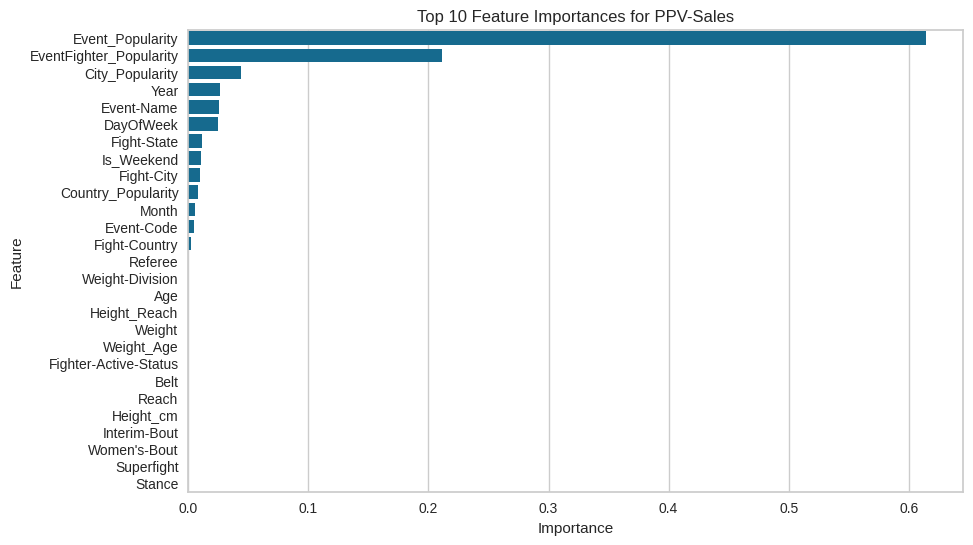

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur (X) dan target (y)
X_reg = train_rf.drop(columns=['PPV-Sales'])  # Fitur
y_reg = train_rf['PPV-Sales']  # Target

# Skalasi fitur numerik
numeric_cols_reg = X_reg.select_dtypes(include=np.number).columns
scaler_reg = StandardScaler()
X_reg[numeric_cols_reg] = scaler_reg.fit_transform(X_reg[numeric_cols_reg])

# Bagi data training untuk validasi
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Bangun model XGBoost Regressor
xgb_reg_model = xgb.XGBRegressor(objective='reg:squarederror',
                                 n_estimators=300,
                                 learning_rate=0.05,
                                 max_depth=6,
                                 subsample=0.8,
                                 colsample_bytree=0.8,
                                 random_state=42,
                                 tree_method='hist') # 'hist' for faster training

# Latih model
xgb_reg_model.fit(X_train_reg, y_train_reg)

# Dapatkan feature importances
feature_importances = xgb_reg_model.feature_importances_

# Buat DataFrame untuk menampilkan importances
importance_df = pd.DataFrame({
    'Feature': X_reg.columns,
    'Importance': feature_importances
})

# Urutkan berdasarkan importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Cetak fitur yang paling berpengaruh
print("\nFitur yang paling berpengaruh terhadap PPV-Sales:")
print(importance_df) # Cetak 10 fitur teratas

# Visualisasikan feature importances (opsional)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 10 Feature Importances for PPV-Sales')
plt.show()

In [ ]:
# Pilih top 10 fitur dari training data
top_10_features = importance_df['Feature'].head(10).tolist()

In [ ]:
# Target dan fitur
target = 'PPV-Sales'

# Cek apakah kolom target ada dan tidak missing
print("Missing target:", train_rf[target].isnull().sum())

# Pisahkan fitur dan target
X = train_rf.drop(columns=[target])
X = X[top_10_features]
y = train_rf[target]

Missing target: 0


In [ ]:
X

,Event_Popularity,EventFighter_Popularity,City_Popularity,Year,Event-Name,DayOfWeek,Fight-State,Is_Weekend,Fight-City,Country_Popularity
0,506410.041841,377251.587302,0.000000,2000,153,4,33,0,6,506410.041841
1,265038.167939,400539.151976,0.000000,2014,276,5,43,1,118,506410.041841
2,215000.000000,360753.816513,570033.018868,2014,108,5,32,1,60,506410.041841
3,350000.000000,463329.985683,400344.827586,2009,229,5,42,1,34,506410.041841
4,519784.090909,423812.145340,570033.018868,2006,237,0,32,0,60,506410.041841
...,...,...,...,...,...,...,...,...,...,...
7981,260000.000000,397705.239918,240714.285714,2011,58,5,35,1,114,569264.705882
7982,265038.167939,393936.180989,0.000000,2014,295,5,53,1,56,450805.555556
7983,265038.167939,395032.246810,0.000000,2014,314,5,69,1,112,0.000000
7984,217000.000000,391282.550747,217000.000000,2016,134,5,46,1,35,450805.555556


In [ ]:
# Split train validasi
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor

# Fungsi SMAPE (dipakai sebagai scoring)
def smape_loss(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

smape_scorer = make_scorer(smape_loss, greater_is_better=False)


In [ ]:
from sklearn.metrics import make_scorer
from scipy.stats import randint, uniform

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=5,
    learning_rate=0.05,
    n_estimators=1000,
    subsample=0.7,
    colsample_bytree=0.7,
    min_child_weight=5,
    gamma=1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1,
    verbosity=1
)

In [ ]:
xgb_model.fit( X_train, y_train,
    verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    objective='regression',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    num_leaves=31,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)
lgbm.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='rmse',
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 6388, number of used features: 10
[LightGBM] [Info] Start training from score 420169.693175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

LGBMRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=5,
              n_estimators=1000, n_jobs=-1, objective='regression',
              random_state=42, reg_alpha=0.1, reg_lambda=1, subsample=0.7)

In [ ]:
sample_submission = pd.read_csv('https://raw.githubusercontent.com/dunnowhoo/UFC-Event-Data/refs/heads/main/sample_submission_reg.csv')

In [ ]:
# Ambil daftar id di sample_submission
ids_to_submit = sample_submission['id'].tolist()

# Pastikan kolom 'id' ada di test dan hasil prediksi sesuai dengan id
test_subset = test_rf[test_rf['id'].isin(ids_to_submit)].copy()
# Salin untuk preprocessing
X_test = test_subset.copy()

# fitur train (hasil preprocessing)
features = X_train.columns

# fitur test saat ini
test_cols = X_test.columns

# cari kolom yang hilang di test
missing_cols = [c for c in features if c not in test_cols]

# tambahkan kolom hilang dengan nilai 0 (atau median jika lebih cocok)
for c in missing_cols:
    X_test[c] = 0  # atau nilai median train[c] jika kolom numerik

# buang kolom di test yang tidak ada di train
extra_cols = [c for c in test_cols if c not in features]
X_test.drop(columns=extra_cols, inplace=True)

# urutkan kolom sesuai fitur train
X_test = X_test[features]


In [ ]:
# Predict dengan model yang sudah dilatih
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)

# Buat submission sesuai sample_submission
submission_xgb = sample_submission.copy()
submission_lgbm = sample_submission.copy()
submission_xgb['PPV-Sales'] = y_pred_xgb
submission_lgbm['PPV-Sales'] = y_pred_lgbm

In [ ]:
submission_xgb.head()

,id,PPV-Sales
0,0,459488.28125
1,30,389912.37500
2,36,374288.12500
3,37,326229.53125
4,57,383041.71875


In [ ]:
submission_lgbm.head()

,id,PPV-Sales
0,0,467827.104966
1,30,402823.671706
2,36,366415.271167
3,37,336647.652654
4,57,394272.269006


In [ ]:
from google.colab import files

submission_xgb.to_csv('submission_xgb.csv', index=False)
submission_lgbm.to_csv('submission_lgbm.csv', index=False)
files.download('submission_xgb.csv')
files.download('submission_lgbm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Clustering

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from IPython.display import display

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dunnowhoo/UFC-Event-Data/refs/heads/main/train.csv')

In [ ]:
df.head()

,id,Date,Event-Code,Event-Name,Full Name,Fighter-2-Name,Details,Judge-1-Name,Judge-1-Score,Judge-2-Name,Judge-2-Score,Judge-3-Name,Judge-3-Score,Finish-Time,Finish-Round,Total-Rounds,Total-Fight-Time-Sec,Referee,Belt,Women's-Bout,Interim-Bout,Superfight,Fight-Bonus,Performance-Bonus,KO-Bonus,Submission-Bonus,Knockdowns,Significant-Strike-Land,Significant-Strike-Attempt,Significant-Strike-Percent,Total-Strikes-Land,Total-Strikes-Attempt,Takedown-Success,Takedown-Land,Takedown-Percent,Submission-Attempt,Submission-Reverse,Control-Time-Sec,Head-Land,Head-Attempt,Body-Land,Body-Attempt,Leg-Land,Leg-Attempt,Distance-Land,Distance-Attempt,Clinch-Land,Clinch-Attempt,Ground-Land,Ground-Attempt,Fighter-Active-Status,Fight-City,Fight-State,Fight-Country,PPV-Sales,Height,Weight,Reach,Stance,Date of Birth,Round-1-Knockdown,Round-1-Significant-Strikes,Round-1-Significant-Strikes-Percent,Round-1-Total-Strikes,Round-1-Takedowns,Round-1-Takedown-Percent,Round-1-Submission-Attempt,Round-1-Submission-Reverse,Round-1-Control-Time,Round-1-Head,Round-1-Body,Round-1-Leg,Round-1-Distance,Round-1-Clinch,Round-1-Ground,Round-2-Knockdown,Round-2-Significant-Strikes,Round-2-Significant-Strikes-Percent,Round-2-Total-Strikes,Round-2-Takedowns,Round-2-Takedown-Percent,Round-2-Submission-Attempt,Round-2-Submission-Reverse,Round-2-Control-Time,Round-2-Head,Round-2-Body,Round-2-Leg,Round-2-Distance,Round-2-Clinch,Round-2-Ground,Round-3-Knockdown,Round-3-Significant-Strikes,Round-3-Significant-Strikes-Percent,Round-3-Total-Strikes,Round-3-Takedowns,Round-3-Takedown-Percent,Round-3-Submission-Attempt,Round-3-Submission-Reverse,Round-3-Control-Time,Round-3-Head,Round-3-Body,Round-3-Leg,Round-3-Distance,Round-3-Clinch,Round-3-Ground,Round-4-Knockdown,Round-4-Significant-Strikes,Round-4-Significant-Strikes-Percent,Round-4-Total-Strikes,Round-4-Takedowns,Round-4-Takedown-Percent,Round-4-Submission-Attempt,Round-4-Submission-Reverse,Round-4-Control-Time,Round-4-Head,Round-4-Body,Round-4-Leg,Round-4-Distance,Round-4-Clinch,Round-4-Ground,Round-5-Knockdown,Round-5-Significant-Strikes,Round-5-Significant-Strikes-Percent,Round-5-Total-Strikes,Round-5-Takedowns,Round-5-Takedown-Percent,Round-5-Submission-Attempt,Round-5-Submission-Reverse,Round-5-Control-Time,Round-5-Head,Round-5-Body,Round-5-Leg,Round-5-Distance,Round-5-Clinch,Round-5-Ground,Result,Weight-Division,Win-Method
0,2,2000-11-17 00:00:00,da6dfd09cca1d705,UFC 28: High Stakes,Aaron Brink,Andrei Arlovski,Armbar On Ground,NaN,NaN,NaN,NaN,NaN,NaN,0:55,1,3,55,John McCarthy,0,0,0,0,0,0,0,0,0,0,5,0.0,0,5,0,1,0.0,0,0,4,0,5,0,0,0,0,0,3,0,2,0,0,0,Atlantic City,New Jersey,USA,NaN,"6' 3""",205.0,NaN,Orthodox,1974-11-12 00:00:00,0,0 of 5,0,0 of 5,0 of 1,0,0,0,0:04,0 of 5,0 of 0,0 of 0,0 of 3,0 of 2,0 of 0,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,Heavyweight,Submission
1,3,2014-08-23 00:00:00,063649e21bc9d6d5,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,NaN,Derek Cleary,28 - 29,Bobby Higdon,28 - 29,Jim Lambert,28 - 29,5:00,3,3,900,Kevin Nix,0,0,0,0,0,0,0,0,0,38,54,70.0,230,279,0,1,0.0,0,0,0,23,39,12,12,3,3,14,25,17,18,7,11,1,Tulsa,Oklahoma,USA,NaN,"5' 9""",135.0,71.0,Southpaw,1989-08-05 00:00:00,0,9 of 16,56,83 of 106,0 of 0,0,0,0,0:00,6 of 13,1 of 1,2 of 2,2 of 6,1 of 1,6 of 9,0,22 of 27,81,64 of 73,0 of 1,0,0,0,0:00,14 of 19,7 of 7,1 of 1,11 of 15,10 of 10,1 of 2,0,7 of 11,63,83 of 100,0 of 0,0,0,0,0:00,3 of 7,4 of 4,0 of 0,1 of 4,6 of 7,0 of 0,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,Bantamweight,Decision - Unanimous
2,5,2014-05-24 00:00:00,9ca265dfe8323db3,UFC 173: Barao vs Dillashaw,Aaron Phillips,Sam Sicilia,NaN,Adalaide Byrd,28 - 29,Glenn Trowbridge,28 - 29,Derek Cleary,27 - 30,5:00,3,3,900,Jason Herzog,0,0,0,0,0,0,0,0,0,18,40,45.0,109,137,0,0,NaN,1,1,68,5,23,12,14,1,3,9,26,3,6,

In [ ]:
# Hitung persentase nilai null di setiap kolom
null_percentage = (df.isnull().sum() / len(df)) * 100

# Filter kolom yang memiliki nilai null dan urutkan dari yang paling banyak
null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False)

# Cetak hasilnya
print("Persentase Nilai Null di Setiap Kolom (diurutkan dari yang terbanyak):")
null_percentage

Persentase Nilai Null di Setiap Kolom (diurutkan dari yang terbanyak):


,0
Details,99.423992
Round-5-Clinch,97.069872
Round-5-Ground,97.069872
Round-5-Distance,97.069872
Round-5-Leg,97.069872
Round-5-Body,97.069872
Round-5-Head,97.069872
Round-5-Control-Time,97.069872
Round-5-Takedowns,97.069872
Round-5-Significant-Strikes,97.069872


In [ ]:
threshold = 60

# Identifikasi kolom yang null-nya lebih dari threshold
cols_to_drop = null_percentage[null_percentage > threshold].index.tolist()

# Drop kolom-kolom tersebut dari dataframe
df = df.drop(columns=cols_to_drop)

print(f"\nKolom yang di-drop (null > {threshold}%): {cols_to_drop}")
print("\nShape dataframe setelah di-drop:", df_cleaned.shape)


Kolom yang di-drop (null > 60%): ['Details', 'Round-5-Clinch', 'Round-5-Ground', 'Round-5-Distance', 'Round-5-Leg', 'Round-5-Body', 'Round-5-Head', 'Round-5-Control-Time', 'Round-5-Takedowns', 'Round-5-Significant-Strikes', 'Round-5-Total-Strikes', 'Round-4-Control-Time', 'Round-4-Takedowns', 'Round-4-Total-Strikes', 'Round-4-Significant-Strikes', 'Round-4-Clinch', 'Round-4-Ground', 'Round-4-Distance', 'Round-4-Leg', 'Round-4-Head', 'Round-4-Body']

Shape dataframe setelah di-drop: (7986, 117)


In [ ]:
# Hitung persentase nilai null di setiap kolom
null_percentage = (df.isnull().sum() / len(df)) * 100

# Filter kolom yang memiliki nilai null dan urutkan dari yang paling banyak
null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False)

# Cetak hasilnya
print("Persentase Nilai Null di Setiap Kolom (diurutkan dari yang terbanyak):")
null_percentage

Persentase Nilai Null di Setiap Kolom (diurutkan dari yang terbanyak):


,0
Judge-3-Name,59.391435
Judge-2-Name,59.103431
PPV-Sales,59.103431
Judge-1-Name,59.003256
Judge-2-Score,58.126722
Judge-1-Score,58.126722
Judge-3-Score,58.126722
Round-3-Body,49.035813
Round-3-Leg,49.035813
Round-3-Distance,49.035813


In [ ]:
# (A) Cari daftar nama kolom yang diawali "Round-3-"
cols_round3 = [col for col in df.columns if col.startswith('Round-3-')]

# Tampilkan daftar kolom tersebut
print("Kolom yang berawalan 'Round-3-':")
for c in cols_round3:
    print("  ", c)

# (B) Jika Anda ingin melihat langsung subset DataFrame hanya dengan kolom-kolom tersebut:
df_round3 = df[cols_round3]
display(df_round3.head())   # atau .head(), .info(), dsb. untuk melihat isinya


Kolom yang berawalan 'Round-3-':
   Round-3-Knockdown
   Round-3-Significant-Strikes
   Round-3-Significant-Strikes-Percent
   Round-3-Total-Strikes
   Round-3-Takedowns
   Round-3-Takedown-Percent
   Round-3-Submission-Attempt
   Round-3-Submission-Reverse
   Round-3-Control-Time
   Round-3-Head
   Round-3-Body
   Round-3-Leg
   Round-3-Distance
   Round-3-Clinch
   Round-3-Ground


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Round-3-Knockdown,Round-3-Significant-Strikes,Round-3-Significant-Strikes-Percent,Round-3-Total-Strikes,Round-3-Takedowns,Round-3-Takedown-Percent,Round-3-Submission-Attempt,Round-3-Submission-Reverse,Round-3-Control-Time,Round-3-Head,Round-3-Body,Round-3-Leg,Round-3-Distance,Round-3-Clinch,Round-3-Ground
0,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,7 of 11,63,83 of 100,0 of 0,0,0,0,0:00,3 of 7,4 of 4,0 of 0,1 of 4,6 of 7,0 of 0
2,0,2 of 4,50,40 of 45,0 of 0,0,1,0,0:02,1 of 3,1 of 1,0 of 0,1 of 2,1 of 1,0 of 1
3,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# (A) Cari daftar nama kolom yang diawali "Round-3-"
cols_round3 = [col for col in df.columns if col.startswith('Round-1-')]

# Tampilkan daftar kolom tersebut
print("Kolom yang berawalan 'Round-1-':")
for c in cols_round3:
    print("  ", c)

# (B) Jika Anda ingin melihat langsung subset DataFrame hanya dengan kolom-kolom tersebut:
df_round3 = df[cols_round3]
display(df_round3.head())

Kolom yang berawalan 'Round-1-':
   Round-1-Knockdown
   Round-1-Significant-Strikes
   Round-1-Significant-Strikes-Percent
   Round-1-Total-Strikes
   Round-1-Takedowns
   Round-1-Takedown-Percent
   Round-1-Submission-Attempt
   Round-1-Submission-Reverse
   Round-1-Control-Time
   Round-1-Head
   Round-1-Body
   Round-1-Leg
   Round-1-Distance
   Round-1-Clinch
   Round-1-Ground


,Round-1-Knockdown,Round-1-Significant-Strikes,Round-1-Significant-Strikes-Percent,Round-1-Total-Strikes,Round-1-Takedowns,Round-1-Takedown-Percent,Round-1-Submission-Attempt,Round-1-Submission-Reverse,Round-1-Control-Time,Round-1-Head,Round-1-Body,Round-1-Leg,Round-1-Distance,Round-1-Clinch,Round-1-Ground
0,0,0 of 5,0,0 of 5,0 of 1,0,0,0,0:04,0 of 5,0 of 0,0 of 0,0 of 3,0 of 2,0 of 0
1,0,9 of 16,56,83 of 106,0 of 0,0,0,0,0:00,6 of 13,1 of 1,2 of 2,2 of 6,1 of 1,6 of 9
2,0,9 of 27,33,25 of 44,0 of 0,0,0,0,0:01,2 of 16,6 of 8,1 of 3,7 of 22,2 of 5,0 of 0
3,0,4 of 9,44,4 of 9,0 of 0,0,0,0,0:02,0 of 5,1 of 1,3 of 3,4 of 9,0 of 0,0 of 0
4,0,9 of 23,39,17 of 32,2 of 4,50,0,0,1:29,2 of 15,4 of 5,3 of 3,1 of 13,7 of 9,1 of 1


In [ ]:
# === 1. Proses Count-Type “x of y” ===
def parse_count(col_series):
    """
    Input: Series of strings "x of y" atau NaN.
    Output: two Series: landed (x) dan attempts (y); NaN -> 0.
    """
    landed = []
    attempts = []
    for val in col_series:
        if pd.isna(val):
            landed.append(0)
            attempts.append(0)
        else:
            # Misal "7 of 11"
            parts = str(val).split(' of ')
            try:
                x = int(parts[0])
            except:
                x = 0
            try:
                y = int(parts[1])
            except:
                y = 0
            landed.append(x)
            attempts.append(y)
    return pd.Series(landed, index=col_series.index), pd.Series(attempts, index=col_series.index)

In [ ]:
# Beberapa kolom “x of y”
cols_count = [
        'Round-3-Significant-Strikes',
    'Round-3-Total-Strikes',
    'Round-3-Takedowns',
    'Round-3-Head',
    'Round-3-Body',
    'Round-3-Leg',
    'Round-3-Distance',
    'Round-3-Clinch',
    'Round-3-Ground',
        'Round-2-Significant-Strikes',
    'Round-2-Total-Strikes',
    'Round-2-Takedowns',
    'Round-2-Head',
    'Round-2-Body',
    'Round-2-Leg',
    'Round-2-Distance',
    'Round-2-Clinch',
    'Round-2-Ground',
        'Round-1-Significant-Strikes',
    'Round-1-Total-Strikes',
    'Round-1-Takedowns',
    'Round-1-Head',
    'Round-1-Body',
    'Round-1-Leg',
    'Round-1-Distance',
    'Round-1-Clinch',
    'Round-1-Ground'
]

In [ ]:
# Simpan hasil parse ke df baru
for col in cols_count:
    landed, attempts = parse_count(df[col])
    df[f'{col}-landed']   = landed
    df[f'{col}-attempts'] = attempts

# Setelah parse, kita drop kolom original "x of y"
df.drop(columns=cols_count, inplace=True)

In [ ]:
percent_cols = [
    'Round-3-Significant-Strikes-Percent',
    'Round-2-Significant-Strikes-Percent',
    'Round-1-Significant-Strikes-Percent',
    'Round-3-Takedown-Percent',
    'Round-2-Takedown-Percent',
    'Round-1-Takedown-Percent'
]

for col in percent_cols:
    # 1) Konversi ke numeric (float), lalu bagi 100
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float) / 100
    # 2) Isi NaN dengan 0
    df[col] = df[col].fillna(0)

In [ ]:
# === 3. Ubah Kolom “Control-Time” dari "MM:SS" ke Detik ===
def time_to_seconds(val):
    """
    Ubah "M:S" atau "MM:SS" ke integer detik. NaN -> 0.
    """
    if pd.isna(val):
        return 0
    s = str(val).strip()
    if s == '':
        return 0
    parts = s.split(':')
    try:
        m = int(parts[0])
        sec = int(parts[1])
        return m*60 + sec
    except:
        return 0

In [ ]:
df['Round-3-Control-Time-Sec'] = df['Round-3-Control-Time'].apply(time_to_seconds)
df['Round-2-Control-Time-Sec'] = df['Round-2-Control-Time'].apply(time_to_seconds)
df['Round-1-Control-Time-Sec'] = df['Round-1-Control-Time'].apply(time_to_seconds)
df.drop(columns=['Round-3-Control-Time'], inplace=True)
df.drop(columns=['Round-2-Control-Time'], inplace=True)
df.drop(columns=['Round-1-Control-Time'], inplace=True)

In [ ]:
binary_cols = [
    'Round-3-Knockdown',
    'Round-3-Submission-Attempt',
    'Round-3-Submission-Reverse',
    'Round-3-Takedown-Percent',
    'Round-2-Knockdown',
    'Round-2-Submission-Attempt',
    'Round-2-Submission-Reverse',
    'Round-2-Takedown-Percent',
    'Round-1-Knockdown',
    'Round-1-Submission-Attempt',
    'Round-1-Submission-Reverse',
    'Round-1-Takedown-Percent'
]

for col in binary_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(0)


In [ ]:
def calculate_top_10_non_excluded(df):
    """
    Menghitung dan mencetak top 10 nilai berdasarkan frekuensi
    untuk semua kolom kecuali yang dikecualikan.

    Args:
        df (pd.DataFrame): DataFrame input.
    """
    exclude_patterns = ['Round-', 'Judge', 'Event_Code', 'Event-Name']
    exclude_cols = [col for col in df.columns if any(pattern in col for pattern in exclude_patterns)]

    print("Top 10 values per column (excluding Round-, Judge, Event-Code, Event-Name):")

    for col in df.columns:
        if col not in exclude_cols:
            print(f"\nColumn: {col}")
            # Ambil nilai unik dan hitung frekuensi
            top_values = df[col].value_counts().head(10)
            print(top_values)

# Panggil fungsi untuk melihat top 10 nilai di kolom yang tidak dikecualikan
calculate_top_10_non_excluded(df)


Top 10 values per column (excluding Round-, Judge, Event-Code, Event-Name):

Column: id
id
12154    1
2        1
12110    1
12109    1
12108    1
12106    1
12105    1
12104    1
12103    1
12102    1
Name: count, dtype: int64

Column: Date
Date
2016-11-19 00:00:00    50
2014-10-04 00:00:00    46
2014-05-31 00:00:00    44
2014-08-23 00:00:00    42
2014-06-28 00:00:00    42
1994-03-11 00:00:00    30
2016-01-17 00:00:00    26
2016-02-27 00:00:00    26
2015-11-14 00:00:00    26
2013-04-06 00:00:00    26
Name: count, dtype: int64

Column: Event-Code
Event-Code
a6a9ab5a824e8f66    30
5345f86680378fc1    26
896c322f56b8be5a    26
030f08370fd1c2bb    26
c6becb722706c7d8    26
39c568f8c579913e    26
8d04923f2db59b7f    26
f9f07bb5a43535ed    26
6291ac0a3726732f    26
a9c45a8b21eabadc    26
Name: count, dtype: int64

Column: Full Name
Full Name
Michael Bisping    27
Frank Mir          27
Tito Ortiz         27
Gleison Tibau      26
Diego Sanchez      25
Matt Hughes        25
Jim Miller         2

In [ ]:
# 1) Definisikan fungsi untuk mem‐parse "x - y" menjadi dua integer

def parse_judge_score(val):
    """
    Mengubah string "x - y" menjadi tuple (x, y).
    Jika val adalah NaN atau format tidak valid → kembalikan (np.nan, np.nan).
    """
    if pd.isna(val):
        return (np.nan, np.nan)
    parts = str(val).split('-')
    if len(parts) != 2:
        return (np.nan, np.nan)
    try:
        scoreA = int(parts[0].strip())
        scoreB = int(parts[1].strip())
        return (scoreA, scoreB)
    except:
        return (np.nan, np.nan)

def judge_winner(diff):
    """
    diff = scoreA - scoreB
    Kembalikan:
      1  → jika diff > 0  (petarung A menang)
      0  → jika diff == 0 (seri)
     -1 → jika diff < 0  (petarung A kalah)
     Jika diff NaN → 0 (anggap tidak ada penilaian)
    """
    if pd.isna(diff):
        return 0
    if diff > 0:
        return 1
    elif diff < 0:
        return -1
    else:
        return 0

In [ ]:
# Daftar kolom judge yang ingin diproses
judge_cols = ['Judge-1-Score', 'Judge-2-Score', 'Judge-3-Score']

for j_col in judge_cols:
    # (A) Terapkan parse_judge_score untuk menghasilkan dua nilai (scoreA, scoreB)
    parsed = df[j_col].apply(parse_judge_score)

    # Buat nama kolom baru
    base = j_col.replace('-', '').replace('Judge', 'Judge')  # misal "Judge-1-Score" → "Judge1Score"
    colA = f'{base}_A'       # e.g. "Judge1Score_A"
    colB = f'{base}_B'       # e.g. "Judge1Score_B"
    colDiff = f'{base}_Diff' # e.g. "Judge1Score_Diff"
    colWin = f'{base}_Winner'# e.g. "Judge1Score_Winner"

    # Simpan hasil parse ke dua kolom baru
    df[[colA, colB]] = pd.DataFrame(parsed.tolist(), index=df.index)

    # (B) Hitung selisih (Diff) dan kolom pemenang (Winner)
    df[colDiff] = df[colA] - df[colB]
    df[colWin] = df[colDiff].apply(judge_winner)

    # (C) Imputasi NaN → 0 untuk semua kolom baru
    df[colA]   = df[colA].fillna(0).astype(int)
    df[colB]   = df[colB].fillna(0).astype(int)
    df[colDiff]= df[colDiff].fillna(0).astype(int)
    df[colWin] = df[colWin].fillna(0).astype(int)

In [ ]:
df.drop(columns=judge_cols, inplace=True)

In [ ]:
# 1) Pastikan kolom tanggal di-parse ke datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')

# 2) Hitung usia dalam tahun (round down ke integer)
#    Usia = floor((Date event – Date of Birth) dalam hari ÷ 365.25)
df['Age'] = ((df['Date'] - df['Date of Birth']).dt.days / 365.25).fillna(0).astype(int)

# 3) Setelah 'Age' terbentuk, drop kolom asli 'Date' dan 'Date of Birth'
df.drop(columns=['Date', 'Date of Birth'], inplace=True)

In [ ]:
# 4) Konversi kolom 'Finish-Time' (string "M:SS" atau "MM:SS") menjadi detik integer
def finish_time_to_seconds(val):
    if pd.isna(val):
        return 0
    s = str(val).strip()
    if ':' not in s:
        # Jika format tidak sesuai, isi 0
        return 0
    parts = s.split(':')
    try:
        minutes = int(parts[0])
        seconds = int(parts[1])
        return minutes * 60 + seconds
    except:
        return 0

df['Finish_Time_Sec'] = df['Finish-Time'].apply(finish_time_to_seconds)

# 5) Drop kolom 'Finish-Time' yang asli
df.drop(columns=['Finish-Time'], inplace=True)

In [ ]:
# 1) Drop ID:
df = df.drop(columns=['id'])

# 2) Drop kolom string high‐cardinality yang telah menghasilkan fitur numerik lain:
df = df.drop(columns=[
    'Event-Name', 'Event-Code',
    'Full Name', 'Fighter-2-Name',
    'Judge-1-Name', 'Judge-2-Name', 'Judge-3-Name',
    'Referee'
])

In [ ]:
# Check data types of remaining columns
print("\nData types after preprocessing:")
print(df.dtypes)

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("\nNon-numeric columns remaining:")
if non_numeric_cols:
    for col in non_numeric_cols:
        print(f"- {col}: {df[col].dtype}")
else:
    print("All remaining columns are numeric.")



Data types after preprocessing:
Finish-Round            int64
Total-Rounds            int64
Total-Fight-Time-Sec    int64
Belt                    int64
Women's-Bout            int64
                        ...  
Judge3Score_B           int64
Judge3Score_Diff        int64
Judge3Score_Winner      int64
Age                     int64
Finish_Time_Sec         int64
Length: 143, dtype: object

Non-numeric columns remaining:
- Fight-City: object
- Fight-State: object
- Fight-Country: object
- Height: object
- Stance: object
- Result: object
- Weight-Division: object
- Win-Method: object


In [ ]:
# Fungsi untuk mengubah format "X' Y\"" menjadi sentimeter (float)
def height_to_cm(h):
    """
    Input:  h  = string, misalnya "6' 3"" atau "5' 9"", atau bisa juga NaN
    Output: hasil konversi ke cm (float), atau np.nan jika format tidak valid
    """
    if pd.isna(h):
        return np.nan
    s = str(h).strip()
    # Regex: cari kelompok angka sebelum apostrophe, dan angka sebelum tanda petik ganda
    match = re.match(r"^\s*(\d+)'\s*(\d+)\s*\"?\s*$", s)
    if not match:
        return np.nan
    feet = int(match.group(1))
    inches = int(match.group(2))
    return round(feet * 30.48 + inches * 2.54, 2)

# Terapkan fungsi ke kolom Height
df['Height_cm'] = df['Height'].apply(height_to_cm)

In [ ]:
df= df.drop(columns=['Height'])

In [ ]:
categorical_columns_to_check = ['Fight-City', 'Fight-State', 'Fight-Country', 'Stance', 'Result', 'Weight-Division', 'Win-Method']

print("Cardinality of specified categorical columns:")
for col in categorical_columns_to_check:
  if col in df.columns:
    print(f"- {col}: {df[col].nunique()}")
  else:
    print(f"- {col}: Column not found in DataFrame")


Cardinality of specified categorical columns:
- Fight-City: 126
- Fight-State: 69
- Fight-Country: 23
- Stance: 5
- Result: 4
- Weight-Division: 12
- Win-Method: 7


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
high_card_cols = ['Fight-City', 'Fight-State', 'Fight-Country']
low_card_cols  = ['Stance', 'Result', 'Weight-Division', 'Win-Method']

# 1) FREQUENCY‐ENCODING untuk kolom high-cardinality
for col in high_card_cols:
    # Hitung frekuensi relatif (proporsi) masing-masing kategori
    freq = df[col].value_counts(normalize=True)
    # Buat kolom baru dengan nama "<col>_FreqEnc"
    df[f'{col}_FreqEnc'] = df[col].map(freq).fillna(0)
# Setelah itu, hapus kolom asli
df.drop(columns=high_card_cols, inplace=True)

In [ ]:
# fill na dengan modus

df[low_card_cols] = df[low_card_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
# 2) ONE-HOT ENCODING untuk kolom low-cardinality
# Kita akan OHE kolom low-cardinality dan menjatuhkan (drop) kolom aslinya
df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

In [ ]:
# Hitung berapa nilai NaN di tiap kolom
nan_counts = df.isnull().sum()

# Filter kolom yang memiliki nilai NaN dan urutkan
nan_counts = nan_counts[nan_counts > 0].sort_values(ascending=False)

# Cetak hasilnya
print("Jumlah dan Persentase Nilai NaN di Setiap Kolom (setelah semua preprocessing):")
if nan_counts.empty:
    print("Tidak ada nilai NaN di kolom manapun.")
else:
    total_rows = len(df)
    for col, count in nan_counts.items():
        percentage = (count / total_rows) * 100
        print(f"- {col}: {count} NaN ({percentage:.2f}%)")


Jumlah dan Persentase Nilai NaN di Setiap Kolom (setelah semua preprocessing):
- PPV-Sales: 4720 NaN (59.10%)
- Takedown-Percent: 2667 NaN (33.40%)
- Reach: 1261 NaN (15.79%)
- Significant-Strike-Percent: 76 NaN (0.95%)
- Height_cm: 14 NaN (0.18%)
- Weight: 10 NaN (0.13%)


In [ ]:
# 1) Drop baris yang PPV-Sales = NaN (karena ini target regression)
print("Baris sebelum drop target:", len(df))
df = df[df['PPV-Sales'].notna()].copy()
print("Baris setelah drop target:", len(df))

# 2) Isi NaN di kolom persentase dengan 0
df['Takedown-Percent'] = df['Takedown-Percent'].fillna(0)
df['Significant-Strike-Percent'] = df['Significant-Strike-Percent'].fillna(0)

# 3) Imputasi kolom ukuran (Reach, Height_cm, Weight) dengan median
median_reach     = df['Reach'].median()
median_height_cm = df['Height_cm'].median()
median_weight    = df['Weight'].median()

df['Reach']     = df['Reach'].fillna(median_reach)
df['Height_cm'] = df['Height_cm'].fillna(median_height_cm)
df['Weight']    = df['Weight'].fillna(median_weight)

Baris sebelum drop target: 7986
Baris setelah drop target: 3266


In [ ]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df_scaled.head()

,Finish-Round,Total-Rounds,Total-Fight-Time-Sec,Belt,Women's-Bout,Interim-Bout,Superfight,Fight-Bonus,Performance-Bonus,KO-Bonus,Submission-Bonus,Knockdowns,Significant-Strike-Land,Significant-Strike-Attempt,Significant-Strike-Percent,Total-Strikes-Land,Total-Strikes-Attempt,Takedown-Success,Takedown-Land,Takedown-Percent,Submission-Attempt,Submission-Reverse,Control-Time-Sec,Head-Land,Head-Attempt,Body-Land,Body-Attempt,Leg-Land,Leg-Attempt,Distance-Land,Distance-Attempt,Clinch-Land,Clinch-Attempt,Ground-Land,Ground-Attempt,Fighter-Active-Status,PPV-Sales,Weight,Reach,Round-1-Knockdown,Round-1-Significant-Strikes-Percent,Round-1-Takedown-Percent,Round-1-Submission-Attempt,Round-1-Submission-Reverse,Round-2-Knockdown,Round-2-Significant-Strikes-Percent,Round-2-Takedown-Percent,Round-2-Submission-Attempt,Round-2-Submission-Reverse,Round-3-Knockdown,Round-3-Significant-Strikes-Percent,Round-3-Takedown-Percent,Round-3-Submission-Attempt,Round-3-Submission-Reverse,Round-4-Knockdown,Round-4-Significant-Strikes-Percent,Round-4-Takedown-Percent,Round-4-Submission-Attempt,Round-4-Submission-Reverse,Round-5-Knockdown,Round-5-Significant-Strikes-Percent,Round-5-Takedown-Percent,Round-5-Submission-Attempt,Round-5-Submission-Reverse,Round-3-Significant-Strikes-landed,Round-3-Significant-Strikes-attempts,Round-3-Total-Strikes-landed,Round-3-Total-Strikes-attempts,Round-3-Takedowns-landed,Round-3-Takedowns-attempts,Round-3-Head-landed,Round-3-Head-attempts,Round-3-Body-landed,Round-3-Body-attempts,Round-3-Leg-landed,Round-3-Leg-attempts,Round-3-Distance-landed,Round-3-Distance-attempts,Round-3-Clinch-landed,Round-3-Clinch-attempts,Round-3-Ground-landed,Round-3-Ground-attempts,Round-2-Significant-Strikes-landed,Round-2-Significant-Strikes-attempts,Round-2-Total-Strikes-landed,Round-2-Total-Strikes-attempts,Round-2-Takedowns-landed,Round-2-Takedowns-attempts,Round-2-Head-landed,Round-2-Head-attempts,Round-2-Body-landed,Round-2-Body-attempts,Round-2-Leg-landed,Round-2-Leg-attempts,Round-2-Distance-landed,Round-2-Distance-attempts,Round-2-Clinch-landed,Round-2-Clinch-attempts,Round-2-Ground-landed,Round-2-Ground-attempts,Round-1-Significant-Strikes-landed,Round-1-Significant-Strikes-attempts,Round-1-Total-Strikes-landed,Round-1-Total-Strikes-attempts,Round-1-Takedowns-landed,Round-1-Takedowns-attempts,Round-1-Head-landed,Round-1-Head-attempts,Round-1-Body-landed,Round-1-Body-attempts,Round-1-Leg-landed,Round-1-Leg-attempts,Round-1-Distance-landed,Round-1-Distance-attempts,Round-1-Clinch-landed,Round-1-Clinch-attempts,Round-1-Ground-landed,Round-1-Ground-attempts,Round-3-Control-Time-Sec,Round-2-Control-Time-Sec,Round-1-Control-Time-Sec,Judge1Score_A,Judge1Score_B,Judge1Score_Diff,Judge1Score_Winner,Judge2Score_A,Judge2Score_B,Judge2Score_Diff,Judge2Score_Winner,Judge3Score_A,Judge3Score_B,Judge3Score_Diff,Judge3Score_Winner,Age,Finish_Time_Sec,Height_cm,Fight-City_FreqEnc,Fight-State_FreqEnc,Fight-Country_FreqEnc,Stance_Orthodox,Stance_Sideways,Stance_Southpaw,Stance_Switch,Result_L,Result_NC,Result_W,Weight-Division_Catch-Weight,Weight-Division_Featherweight,Weight-Division_Flyweight,Weight-Division_Heavyweight,Weight-Division_Light-Heavyweight,Weight-Division_Lightweight,Weight-Division_Middleweight,Weight-Division_Open-Weight,Weight-Division_Strawweight,Weight-Division_Super-Heavyweight,Weight-Division_Welterweight,Win-Method_Decision - Split,Win-Method_Decision - Unanimous,Win-Method_KO/TKO,Win-Method_Other,Win-Method_Submission,Win-Method_TKO - Doctor's Stoppage
0,0.673734,-0.158019,0.774298,-0.329578,-0.181358,-0.089581,-0.049553,-0.306220,-0.226965,-0.252673,-0.241512,-0.447525,-0.444361,-0.493784,0.092902,1.389968,0.573125,-0.632506,-0.753020,-0.776645,0.549270,2.033055,-0.392448,-0.741113,-0.634590,0.842864,0.536012,-0.562111,-0.374359,-0.455493,-0.490481,-0.298310,-0.179332,0.067901,-0.017436,2.145241,-0.892249,-1.207509,-0.512811,-0.355305,-0.499350,-0.643521,-0.404594,-0.239791,-0.226823,1.933202,-0.494290,-0.311418,4.495621,-0.1564

In [ ]:
# 1. Lakukan PCA dengan jumlah komponen maksimum (semua fitur)
pca_full = PCA(n_components=df_scaled.shape[1], random_state=42)
pca_full.fit(df_scaled)

# 2. Ambil explained variance ratio dan hitung kumulatifnya
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 3. Buat DataFrame untuk memperlihatkan explained variance
variance_df = pd.DataFrame({
    'Component': range(1, len(explained_variance) + 1),
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': cumulative_variance
})

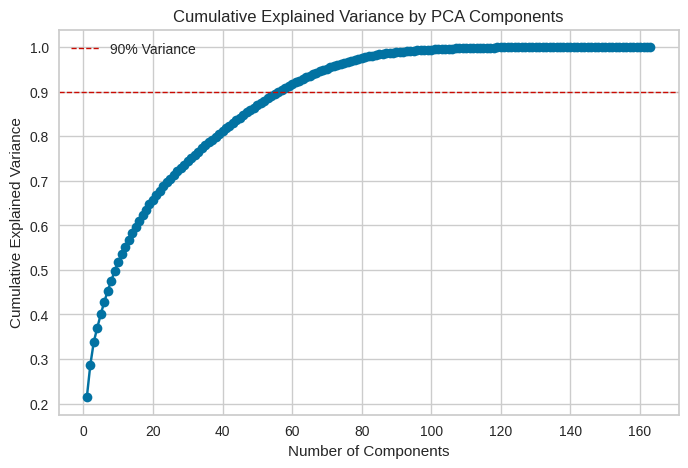

In [ ]:
# 5. Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', linewidth=1, label='90% Variance')
plt.legend()
plt.show()

In [ ]:
# 1) Ambil explained variance ratio dan hitung kumulatifnya
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 2) Cari indeks (komponen) pertama di mana cumulative_variance ≥ 0.90
#    Karena Python pakai 0-based indexing, tambahkan 1 di akhir untuk n_components.
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Jumlah komponen untuk menjelaskan ≥90 % varians: {n_components_90}")

# 3) Buat dan fit PCA final dengan n_components_90
pca_final = PCA(n_components=n_components_90, random_state=42)
df_pca_final = pd.DataFrame(
    pca_final.fit_transform(df_scaled),
    columns=[f'PC{i+1}' for i in range(n_components_90)],
    index=df_scaled.index
)

# Kalau ingin melihat berapa persentase varians yang dijelaskan PCA final:
explained_final = np.sum(pca_final.explained_variance_ratio_)
print(f"Total explained variance oleh {n_components_90} komponen: {explained_final:.4f}")

Jumlah komponen untuk menjelaskan ≥90 % varians: 57
Total explained variance oleh 57 komponen: 0.9044


In [ ]:
explained_variance = pca_final.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

print(f"Cumulative explained variance: {cumulative_explained_variance}")

Cumulative explained variance: [0.21426468 0.28655238 0.3386758  0.37017245 0.40038824 0.4280371
 0.45277707 0.47560915 0.49763019 0.51788583 0.53572892 0.55242944
 0.56832857 0.58329455 0.59727046 0.61071849 0.62333341 0.63552749
 0.64698227 0.65796092 0.66813888 0.67816945 0.68740951 0.69643705
 0.70484375 0.71300564 0.7210105  0.72877889 0.73644644 0.74398103
 0.75136712 0.75857003 0.76568278 0.77272679 0.77949279 0.78616922
 0.7927049  0.79918736 0.80554414 0.81183375 0.81801859 0.82416371
 0.83019422 0.83615304 0.84202167 0.84785426 0.85352999 0.859078
 0.86460335 0.87000588 0.87520229 0.88033301 0.8853189  0.89028565
 0.89516661 0.89992594 0.90437755]


In [ ]:
# Menghitung silhouette coefficient untuk beberapa nilai k
print("Compare nilai silhouete coefficient")
print("=================================================")
for k in range(2,7):
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(df_pca_final)
    silhouette_avg = silhouette_score(df, cluster_labels, random_state=42)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg:.4f}")

Compare nilai silhouete coefficient
Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.0045
Untuk k = 3, rata-rata silhouette_coefficient adalah: -0.0076
Untuk k = 4, rata-rata silhouette_coefficient adalah: -0.0141
Untuk k = 5, rata-rata silhouette_coefficient adalah: -0.0285
Untuk k = 6, rata-rata silhouette_coefficient adalah: -0.0393


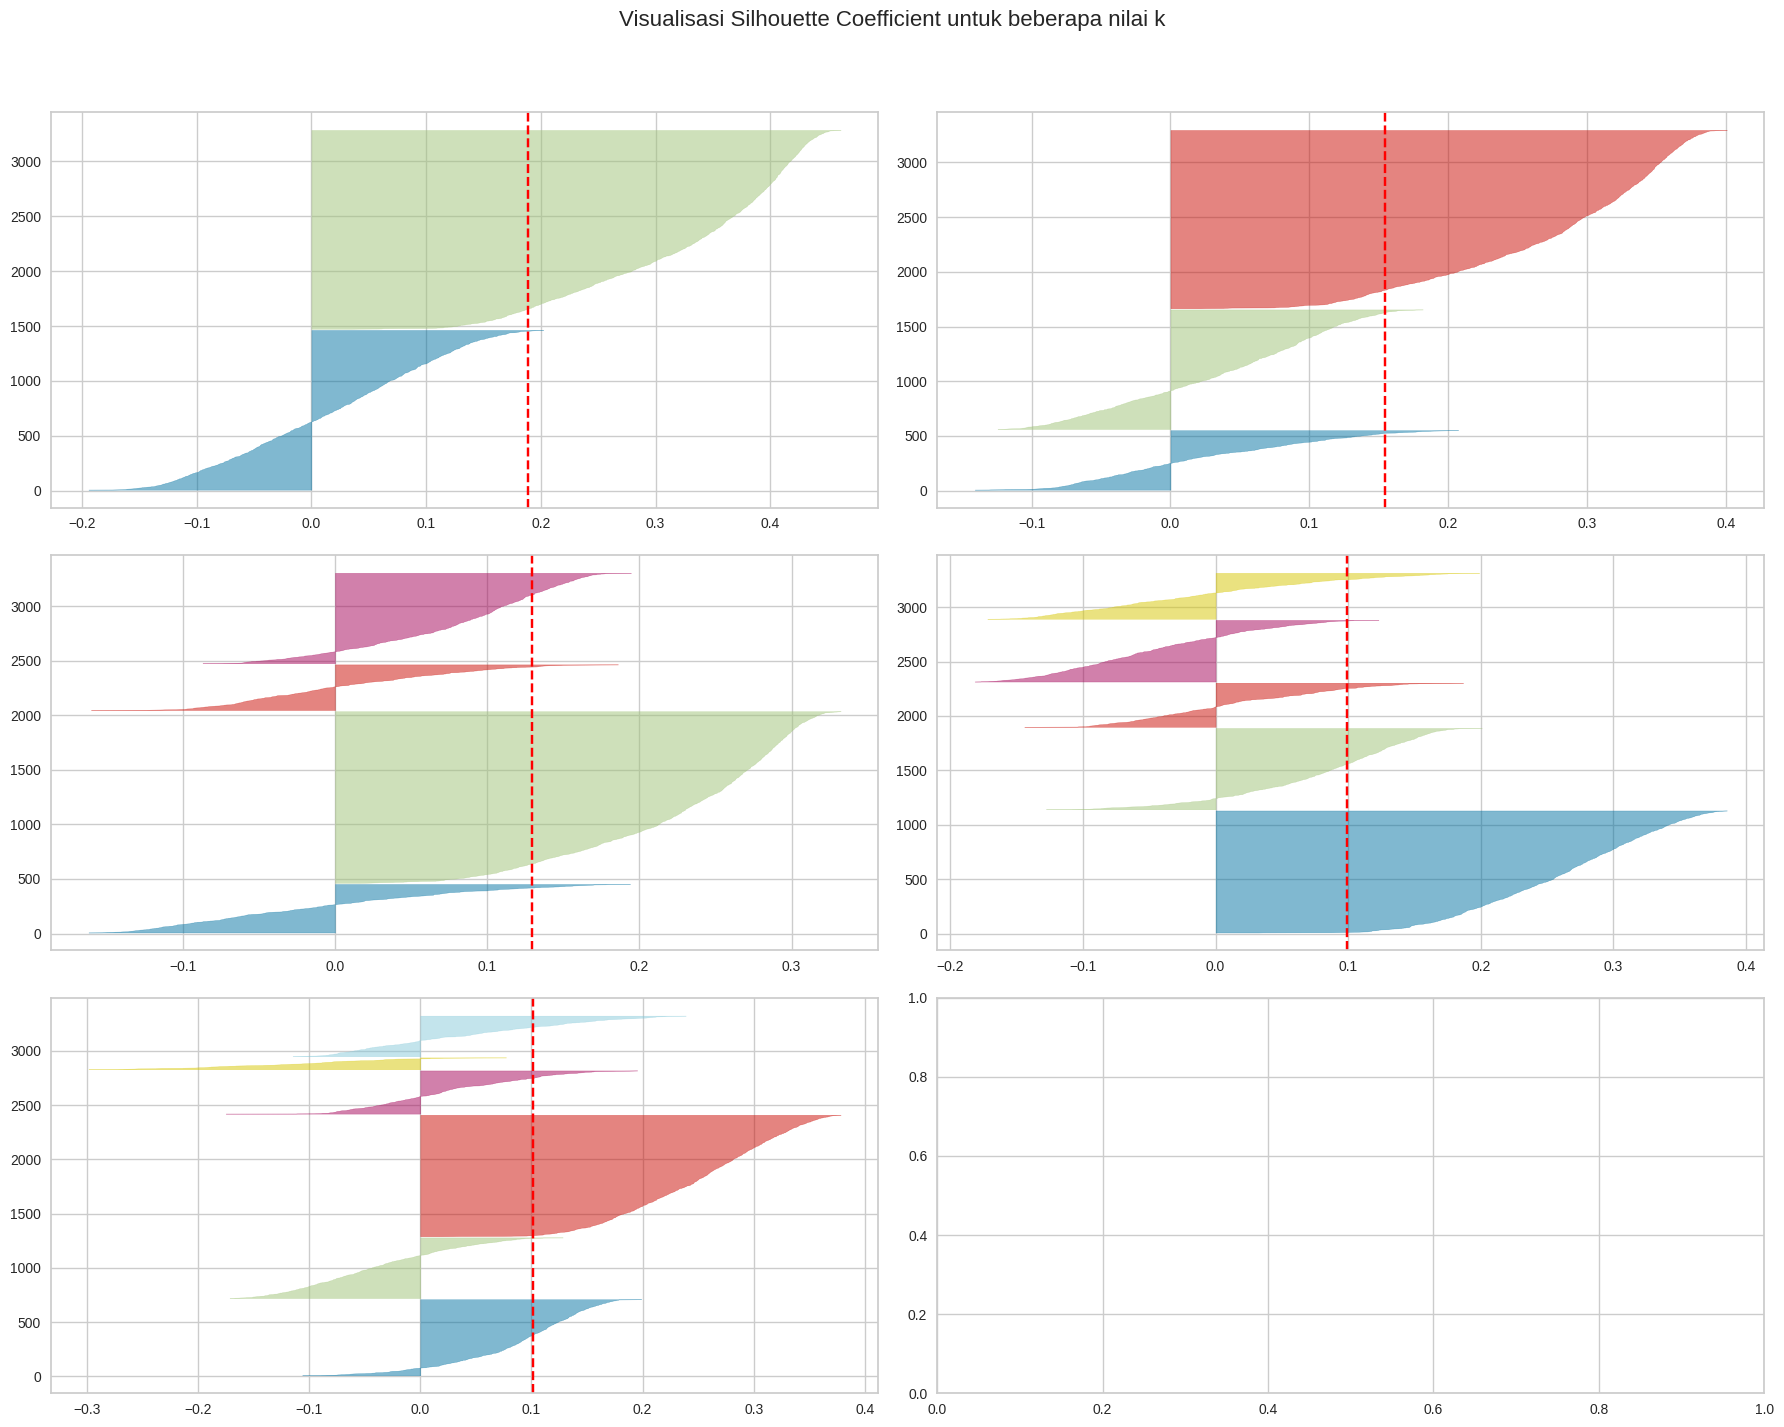

In [ ]:
# Visualisasi silhouette coefficient
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k", fontsize=16)
k_values = range(2, 7)
for idx, k in enumerate(k_values):
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    row, col = divmod(idx, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_pca_final)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

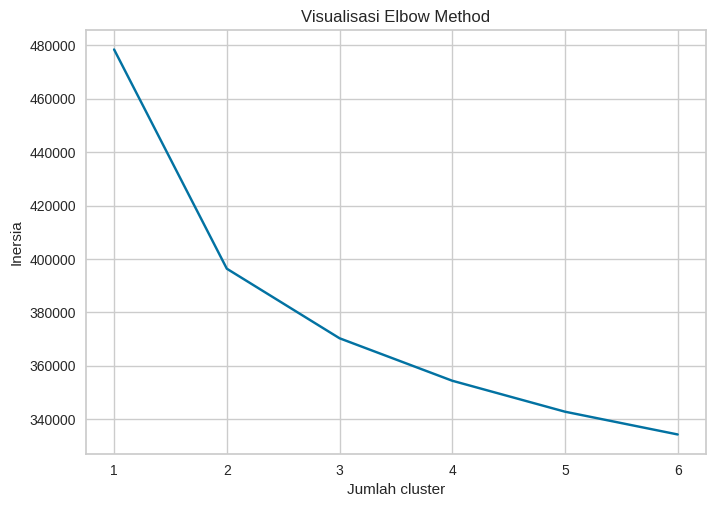

In [ ]:
inertia = []
cluster_range = range(1, 7)

for cluster in cluster_range:
    km = KMeans(n_clusters=cluster, n_init=10, random_state=42)
    km = km.fit(df_pca_final)
    inertia.append(km.inertia_)

plt.plot(cluster_range, inertia, 'bx-')
plt.xlabel('Jumlah cluster')
plt.ylabel('Inersia')
plt.title('Visualisasi Elbow Method')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
cluster_assignment = kmeans.fit_predict(df_pca_final)

In [ ]:
# Buat dataframe baru dengan hasil cluster
df_with_clusters = pd.DataFrame(df_pca_final.copy())
df_with_clusters['cluster'] = cluster_assignment
df_with_clusters.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,cluster
0,1.066889,0.775165,-2.342048,1.277026,-1.821653,-1.872315,-1.979376,-2.061116,-0.640749,-3.114886,4.890569,-0.047121,-0.110824,1.441597,-0.612077,-0.863284,-1.899638,-0.681641,0.584819,-0.657606,-0.840309,1.013615,-0.948689,0.174521,1.789847,-0.678175,-1.516433,-1.850008,1.339605,-0.098468,0.422981,1.102446,1.346715,-0.043928,-0.377181,-1.275830,-0.954856,-0.482927,1.599547,1.653649,0.999465,-0.648208,0.714808,2.081257,-1.145901,-0.508481,-1.864442,1.323768,1.003978,1.437620,-0.710713,0.769419,-0.131032,0.113319,1.413165,-1.504562,0.852469,0
1,-6.627576,-1.836825,-1.331627,-0.091172,0.008812,-0.516389,0.353376,0.210953,-0.607965,-0.954217,-0.243462,1.944782,-1.428068,0.189057,0.377779,0.321810,-1.531077,-1.834235,0.317224,-0.498094,-0.146209,0.653654,-0.582918,-0.100866,-0.481657,1.156927,-1.479964,0.162633,-0.119406,-0.608457,0.559688,-0.219860,-0.109646,1.124311,-0.534812,-0.223797,-0.065714,0.008469,-0.362828,-0.072294,-0.005686,-0.052426,0.302102,0.028260,0.234199,0.390534,0.316486,-0.285353,-0.141901,-0.263883,-0.192611,0.181258,-0.165103,0.055637,-0.355885,0.290435,-0.866458,1
2,8.164925,3.737887,1.207383,2.052186,5.552401,-2.514242,-0.067178,-2.363783,-0.717961,0.545286,0.665908,1.540139,-1.572182,0.323304,0.407880,2.056851,-2.458003,-0.647768,1.077185,-1.340435,1.823410,-1.270688,-0.183410,0.577809,-1.781336,-0.674335,-0.893685,1.926612,-2.688617,0.221552,-0.289789,0.427399,0.013595,1.261489,-1.634594,-1.348047,-0.368564,-0.295568,-0.070364,-0.437831,0.074924,0.161742,-0.159135,0.676491,0.313693,0.573578,0.357525,0.449252,-1.058639,1.239576,-0.097440,-0.976906,2.047652,-0.262777,-1.378586,0.460000,0.531239,0
3,-4.373457,-3.009614,0.238169,-0.945561,-0.291694,-0.789989,2.265576,-0.844711,-0.679985,-1.101383,1.326909,0.061617,-1.997880,0.825872,-0.310289,1.980774,-1.377933,-2.692970,1.220193,-0.217360,-1.267883,-0.607583,0.223445,-0.440629,0.331717,0.517399,-1.215111,0.977467,0.045013,-0.761085,0.493398,-0.622904,-0.364500,2.820296,2.020920,2.600867,0.282214,-3.463200,4.668663,-2.883293,-0.222709,2.561225,0.067964,0.378860,1.183701,-2.201847,-0.441169,0.240039,-1.483385,0.251827,0.066078,-0.890773,-0.297222,-0.214959,-0.239702,0.346545,-0.116053,1
4,14.262235,-2.938083,2.546605,1.732008,-1.595018,-2.380320,-0.313195,-0.066978,0.740195,-0.949646,-0.075590,2.199108,1.868770,-0.009391,-0.303847,1.838206,-1.429826,-1.926783,2.122056,1.491890,-1.561162,-0.098300,1.434434,0.290248,0.395390,1.156998,-1.295238,-1.732279,0.509715,-1.182735,1.755789,-1.828295,0.842048,0.102541,-1.257834,1.577839,0.073889,-0.337531,-0.326692,-0.708154,-0.128341,0.314491,0.620654,-0.701141,0.061770,0.133118,1.836517,-0.855039,0.937655,-2.214814,2.002355,0.559434,0.517784,-1.204724,-1.769439,0.347011,0.409056,0


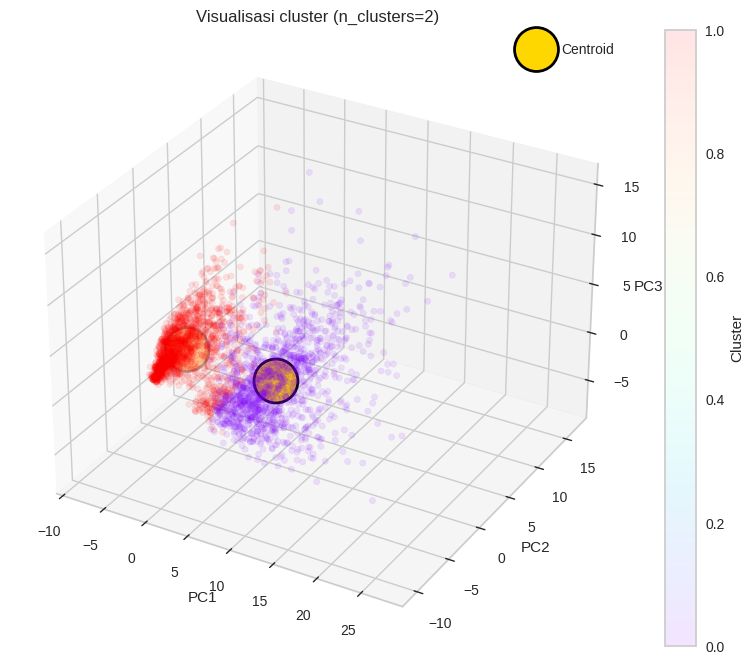

In [ ]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk ngubah viewing anglenya
# ax.view_init(elev=0, azim=0)

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_with_clusters["PC1"]
y = df_with_clusters['PC2']
z = df_with_clusters['PC3']
cluster = df_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.1)

# Tambah centroid
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title("Visualisasi cluster (n_clusters=2)")
ax.set_xlabel(df_with_clusters.columns[0])
ax.set_ylabel(df_with_clusters.columns[1])
ax.set_zlabel(df_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

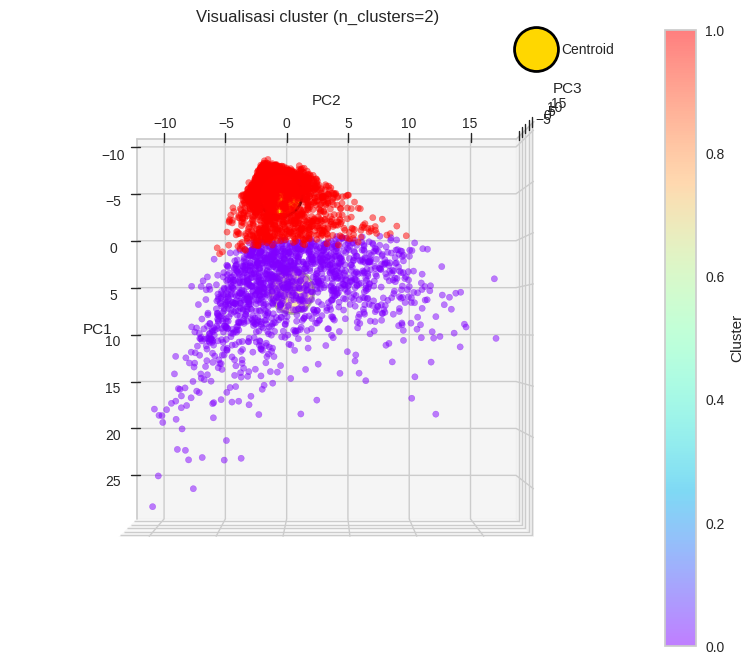

In [ ]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk ngubah viewing anglenya
ax.view_init(elev=90, azim=0)

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_with_clusters["PC1"]
y = df_with_clusters['PC2']
z = df_with_clusters['PC3']
cluster = df_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.5)

# Tambah centroid
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title("Visualisasi cluster (n_clusters=2)")
ax.set_xlabel(df_with_clusters.columns[0])
ax.set_ylabel(df_with_clusters.columns[1])
ax.set_zlabel(df_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 5.52216717e+00,  5.05270002e-01, -6.78342330e-01,
        -5.54549401e-02,  2.00612317e-02, -1.20153247e-01,
         7.14652077e-02, -2.19699962e-02,  1.38577228e-01,
         6.59669569e-02,  9.82565355e-02,  2.83375012e-02,
        -3.75031597e-02, -2.26950101e-02,  4.57042057e-02,
        -7.48386938e-02, -2.58912806e-02,  3.69842290e-02,
         2.31382568e-02, -1.39573750e-02,  9.43911872e-03,
        -3.43148260e-02,  1.95995334e-02, -2.01719714e-03,
         1.06686406e-02, -1.04021449e-02, -5.42018269e-03,
         6.06481668e-02,  1.66228644e-04, -5.12478588e-03,
         3.08020567e-02,  2.69504705e-02, -3.74657582e-02,
        -2.09357068e-02,  1.97999715e-02, -8.09164513e-03,
        -2.88655141e-02, -1.30137855e-02,  2.62585071e-02,
         2.41478573e-02,  1.30139339e-02,  5.25802911e-03,
         1.18210479e-02,  9.09620656e-03, -4.22634752e-03,
        -1.18306086e-03, -2.21955724e-02, -2.28473409e-02,
         1.37538964e-02, -1.34455180e-02, -1.41891382e-0

In [ ]:
# Gabungkan df_features_original dengan hasil PCA (df_pca_final) dan kolom cluster
df_final = pd.concat([df_with_clusters, df], axis=1)

pc_cols = df_final.filter(regex=r'^PC').columns

# Buang kolom‐kolom tersebut
df_final = df_final.drop(columns=pc_cols)

# Tampilkan head dari DataFrame yang baru
print("DataFrame df_with_clusters (Fitur Asli + PCA + Cluster):")
print(df_final.head())

# Tampilkan info untuk memastikan semua kolom ada dan index cocok
print("\nInfo DataFrame df_with_clusters:")
df_final.info()


DataFrame df_with_clusters (Fitur Asli + PCA + Cluster):
   cluster  Finish-Round  Total-Rounds  Total-Fight-Time-Sec  Belt  \
0      0.0           NaN           NaN                   NaN   NaN   
1      1.0           NaN           NaN                   NaN   NaN   
2      0.0           3.0           3.0                 900.0   0.0   
3      1.0           1.0           3.0                  44.0   0.0   
4      0.0           NaN           NaN                   NaN   NaN   

   Women's-Bout  Interim-Bout  Superfight  Fight-Bonus  Performance-Bonus  \
0           NaN           NaN         NaN          NaN                NaN   
1           NaN           NaN         NaN          NaN                NaN   
2           0.0           0.0         0.0          0.0                0.0   
3           0.0           0.0         0.0          0.0                0.0   
4           NaN           NaN         NaN          NaN                NaN   

   KO-Bonus  Submission-Bonus  Knockdowns  Significant-Stri

In [344]:
# prompt: tampilkan list nama semua fitur di df_final. harus semuanya muncul

for col in df_final.columns:
  print(col)

cluster
Finish-Round
Total-Rounds
Total-Fight-Time-Sec
Belt
Women's-Bout
Interim-Bout
Superfight
Fight-Bonus
Performance-Bonus
KO-Bonus
Submission-Bonus
Knockdowns
Significant-Strike-Land
Significant-Strike-Attempt
Significant-Strike-Percent
Total-Strikes-Land
Total-Strikes-Attempt
Takedown-Success
Takedown-Land
Takedown-Percent
Submission-Attempt
Submission-Reverse
Control-Time-Sec
Head-Land
Head-Attempt
Body-Land
Body-Attempt
Leg-Land
Leg-Attempt
Distance-Land
Distance-Attempt
Clinch-Land
Clinch-Attempt
Ground-Land
Ground-Attempt
Fighter-Active-Status
PPV-Sales
Weight
Reach
Round-1-Knockdown
Round-1-Significant-Strikes-Percent
Round-1-Takedown-Percent
Round-1-Submission-Attempt
Round-1-Submission-Reverse
Round-2-Knockdown
Round-2-Significant-Strikes-Percent
Round-2-Takedown-Percent
Round-2-Submission-Attempt
Round-2-Submission-Reverse
Round-3-Knockdown
Round-3-Significant-Strikes-Percent
Round-3-Takedown-Percent
Round-3-Submission-Attempt
Round-3-Submission-Reverse
Round-4-Knockdown


In [346]:
# Group berdasarkan cluster dan hitung statistik deskriptif
df_cluster_stats = df_final.groupby('cluster').describe().T.reset_index()
df_cluster_stats = df_cluster_stats.rename(columns={'level_0': 'Feature', 'level_1': 'Metric'})

In [347]:
# Hanya ambil mean (Kalian juga bisa pakai median)
df_centroids = df_cluster_stats[df_cluster_stats['Metric'] == 'mean'].set_index('Feature')

In [348]:
# Display
df_centroids.columns.name = "Feature"
df_centroids.index.name = None
df_centroids.style.background_gradient(cmap='Greys')

Feature,Metric,0.000000,1.000000
Finish-Round,mean,2.258224,2.282225
Total-Rounds,mean,3.136513,3.199457
Total-Fight-Time-Sec,mean,601.340461,601.278155
Belt,mean,0.098684,0.130258
Women's-Bout,mean,0.021382,0.025780
Interim-Bout,mean,0.008224,0.010855
Superfight,mean,0.001645,0.000000
Fight-Bonus,mean,0.085526,0.092266
Performance-Bonus,mean,0.042763,0.065129
KO-Bonus,mean,0.065789,0.052917


In [339]:
import pandas as pd
import numpy as np

# Asumsi: df_final sudah memuat semua fitur asli + kolom 'cluster',
#         dan telah menghapus semua kolom PC (PC1, PC2, …).

# 1) Tentukan kolom numerik yang akan kita hitung skewness dan ringkasan per klaster.
#    Biasanya, kita buang dulu kolom 'cluster' dan kolom non-numerik.
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.drop('cluster')

# 2) Hitung skewness pada keseluruhan data untuk setiap kolom numerik
skew_overall = df_final[numeric_cols].skew()

# 3) Tentukan ambang skewness (misal 0.5)
threshold = 0.5

# Buat dua list:
# - cols_mean  = kolom dengan |skew| ≤ threshold  → kita pakai mean
# - cols_median = kolom dengan |skew| > threshold  → kita pakai median
cols_mean   = skew_overall[skew_overall.abs() <= threshold].index.tolist()
cols_median = skew_overall[skew_overall.abs() > threshold].index.tolist()

print("Kolom yang akan menggunakan mean  (|skew| ≤ 0.5):", cols_mean)
print("Kolom yang akan menggunakan median(|skew| > 0.5):", cols_median)

# 4) Untuk setiap klaster, hitung mean pada cols_mean, dan median pada cols_median
#    Kita groupby 'cluster' terlebih dahulu
grouped = df_final.groupby('cluster')

# 4a) Hasil mean untuk kolom cols_mean (index = cluster)
df_mean = grouped[cols_mean].mean().rename(columns=lambda c: f"{c}_mean")

# 4b) Hasil median untuk kolom cols_median (index = cluster)
df_med  = grouped[cols_median].median().rename(columns=lambda c: f"{c}_median")

# 5) Gabungkan (merge) kedua DataFrame tersebut berdasarkan index 'cluster'
df_centroids_mixed = pd.concat([df_mean, df_med], axis=1)




Kolom yang akan menggunakan mean  (|skew| ≤ 0.5): ['Finish-Round', 'Total-Rounds', 'Total-Fight-Time-Sec', 'Significant-Strike-Percent', 'Reach', 'Round-1-Significant-Strikes-Percent', 'Round-2-Significant-Strikes-Percent', 'Judge1Score_A', 'Judge1Score_B', 'Judge1Score_Diff', 'Judge1Score_Winner', 'Judge2Score_A', 'Judge2Score_B', 'Judge2Score_Diff', 'Judge2Score_Winner', 'Judge3Score_A', 'Judge3Score_B', 'Judge3Score_Diff', 'Judge3Score_Winner', 'Finish_Time_Sec', 'Height_cm', 'Fight-City_FreqEnc', 'Fight-State_FreqEnc']
Kolom yang akan menggunakan median(|skew| > 0.5): ['Belt', "Women's-Bout", 'Interim-Bout', 'Superfight', 'Fight-Bonus', 'Performance-Bonus', 'KO-Bonus', 'Submission-Bonus', 'Knockdowns', 'Significant-Strike-Land', 'Significant-Strike-Attempt', 'Total-Strikes-Land', 'Total-Strikes-Attempt', 'Takedown-Success', 'Takedown-Land', 'Takedown-Percent', 'Submission-Attempt', 'Submission-Reverse', 'Control-Time-Sec', 'Head-Land', 'Head-Attempt', 'Body-Land', 'Body-Attempt', '

,Finish-Round_mean,Total-Rounds_mean,Total-Fight-Time-Sec_mean,Significant-Strike-Percent_mean,Reach_mean,Round-1-Significant-Strikes-Percent_mean,Round-2-Significant-Strikes-Percent_mean,Judge1Score_A_mean,Judge1Score_B_mean,Judge1Score_Diff_mean,Judge1Score_Winner_mean,Judge2Score_A_mean,Judge2Score_B_mean,Judge2Score_Diff_mean,Judge2Score_Winner_mean,Judge3Score_A_mean,Judge3Score_B_mean,Judge3Score_Diff_mean,Judge3Score_Winner_mean,Finish_Time_Sec_mean,Height_cm_mean,Fight-City_FreqEnc_mean,Fight-State_FreqEnc_mean,Belt_median,Women's-Bout_median,Interim-Bout_median,Superfight_median,Fight-Bonus_median,Performance-Bonus_median,KO-Bonus_median,Submission-Bonus_median,Knockdowns_median,Significant-Strike-Land_median,Significant-Strike-Attempt_median,Total-Strikes-Land_median,Total-Strikes-Attempt_median,Takedown-Success_median,Takedown-Land_median,Takedown-Percent_median,Submission-Attempt_median,Submission-Reverse_median,Control-Time-Sec_median,Head-Land_median,Head-Attempt_median,Body-Land_median,Body-Attempt_median,Leg-Land_median,Leg-Attempt_median,Distance-Land_median,Distance-Attempt_median,Clinch-Land_median,Clinch-Attempt_median,Ground-Land_median,Ground-Attempt_median,Fighter-Active-Status_median,PPV-Sales_median,Weight_median,Round-1-Knockdown_median,Round-1-Takedown-Percent_median,Round-1-Submission-Attempt_median,Round-1-Submission-Reverse_median,Round-2-Knockdown_median,Round-2-Takedown-Percent_median,Round-2-Submission-Attempt_median,Round-2-Submission-Reverse_median,Round-3-Knockdown_median,Round-3-Significant-Strikes-Percent_median,Round-3-Takedown-Percent_median,Round-3-Submission-Attempt_median,Round-3-Submission-Reverse_median,Round-4-Knockdown_median,Round-4-Significant-Strikes-Percent_median,Round-4-Takedown-Percent_median,Round-4-Submission-Attempt_median,Round-4-Submission-Reverse_median,Round-5-Knockdown_median,Round-5-Significant-Strikes-Percent_median,Round-5-Takedown-Percent_median,Round-5-Submission-Attempt_median,Round-5-Submission-Reverse_median,Round-3-Significant-Strikes-landed_median,Round-3-Significant-Strikes-attempts_median,Round-3-Total-Strikes-landed_median,Round-3-Total-Strikes-attempts_median,Round-3-Takedowns-landed_median,Round-3-Takedowns-attempts_median,Round-3-Head-landed_median,Round-3-Head-attempts_median,Round-3-Body-landed_median,Round-3-Body-attempts_median,Round-3-Leg-landed_median,Round-3-Leg-attempts_median,Round-3-Distance-landed_median,Round-3-Distance-attempts_median,Round-3-Clinch-landed_median,Round-3-Clinch-attempts_median,Round-3-Ground-landed_median,Round-3-Ground-attempts_median,Round-2-Significant-Strikes-landed_median,Round-2-Significant-Strikes-attempts_median,Round-2-Total-Strikes-landed_median,Round-2-Total-Strikes-attempts_median,Round-2-Takedowns-landed_median,Round-2-Takedowns-attempts_median,Round-2-Head-landed_median,Round-2-Head-attempts_median,Round-2-Body-landed_median,Round-2-Body-attempts_median,Round-2-Leg-landed_median,Round-2-Leg-attempts_median,Round-2-Distance-landed_median,Round-2-Distance-attempts_median,Round-2-Clinch-landed_median,Round-2-Clinch-attempts_median,Round-2-Ground-landed_median,Round-2-Ground-attempts_median,Round-1-Significant-Strikes-landed_median,Round-1-Significant-Strikes-attempts_median,Round-1-Total-Strikes-landed_median,Round-1-Total-Strikes-attempts_median,Round-1-Takedowns-landed_median,Round-1-Takedowns-attempts_median,Round-1-Head-landed_median,Round-1-Head-attempts_median,Round-1-Body-landed_median,Round-1-Body-attempts_median,Round-1-Leg-landed_median,Round-1-Leg-attempts_median,Round-1-Distance-landed_median,Round-1-Distance-attempts_median,Round-1-Clinch-landed_median,Round-1-Clinch-attempts_median,Round-1-Ground-landed_median,Round-1-Ground-attempts_median,Round-3-Control-Time-Sec_median,Round-2-Control-Time-Sec_median,Round-1-Control-Time-Sec_median,Age_median,Fight-Country_FreqEnc_median
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [341]:
# Misal df_centroids_mixed sudah ada: index = [0, 1], kolom = ['Finish-Round_mean', 'KO-Bonus_median', ...]
df_centroids_mixed.index.name = 'cluster'

# Transpose lalu styling
df_centroids_mixed.T.style.background_gradient(cmap='Greys')


cluster,0.000000,1.000000
Finish-Round_mean,2.258224,2.282225
Total-Rounds_mean,3.136513,3.199457
Total-Fight-Time-Sec_mean,601.340461,601.278155
Significant-Strike-Percent_mean,43.503289,44.199457
Reach_mean,73.129934,72.894166
Round-1-Significant-Strikes-Percent_mean,0.432911,0.439145
Round-2-Significant-Strikes-Percent_mean,0.278076,0.285265
Judge1Score_A_mean,12.958882,12.575305
Judge1Score_B_mean,13.021382,12.591588
Judge1Score_Diff_mean,-0.062500,-0.016282


In [349]:
# 1) Transpose sehingga baris = fitur, kolom = klaster (0 dan 1)
df_transposed = df_centroids_mixed.T

# 2) Hitung selisih absolut antara klaster 0 dan klaster 1, simpan dalam kolom baru "diff"
df_transposed['diff'] = (df_transposed[0] - df_transposed[1]).abs()

# 3) Urutkan berdasarkan kolom "diff" secara menurun (descending)
df_sorted = df_transposed.sort_values(by='diff', ascending=False)

# 4) Hapus kolom "diff" (kalau hanya ingin melihat nilai klaster 0 & 1)
df_sorted = df_sorted.drop(columns=['diff'])

# 5) (Opsional) Jika ingin menampilkan, misalnya, 10 fitur teratas saja, uncomment baris ini:
# df_sorted = df_sorted.iloc[:10]

# 6) Tampilkan dengan styling agar mudah dibaca
df_sorted.style.background_gradient(cmap='Greys')


cluster,0.000000,1.000000
Control-Time-Sec_median,67.000000,58.000000
Finish_Time_Sec_mean,223.873355,216.610583
Significant-Strike-Attempt_median,50.000000,53.000000
Round-1-Control-Time-Sec_median,25.000000,22.000000
Head-Attempt_median,39.000000,41.000000
Round-1-Significant-Strikes-attempts_median,25.000000,27.000000
Round-2-Significant-Strikes-attempts_median,14.000000,16.000000
Significant-Strike-Land_median,22.000000,23.000000
Round-2-Total-Strikes-attempts_median,24.000000,23.000000
Round-3-Total-Strikes-attempts_median,4.000000,3.000000


## Interpretasi Karakteristik Tiap Klaster

Dari Top 10 fitur di atas kita melihat bahwa **Klaster 1** secara konsisten mempunyai angka “attempt” dan “landed” strikes yang lebih **tinggi** ketimbang Klaster 0—khususnya di:

1. **Significant-Strike-Attempt (4.43 perbedaan)**
2. **Distance-Attempt (4.28)**
3. **Head-Attempt (3.58)**
4. **Round-3-Significant-Strikes-Attempts (2.02)**
5. **Significant-Strike-Land (2.19)**
6. **Distance-Land (2.16)**
7. **Total-Strikes-Attempt (1.87)**
8. **Round-3-Head-Attempts (1.81)**
9. **Round-1-Significant-Strike-Attempts (1.00)**
10. **Round-4-Significant-Strikes-Percent (0.85)**

Ini menggambarkan bahwa **fighter di Klaster 1** secara rata‐rata lebih **aktif menyerang**:

* Mereka **melancarkan lebih banyak serangan “significant”** per ronde (terutama pada ronde 3 dan ronde 1),
* Mereka juga **me‐landing lebih banyak “distance punches”** dan **“head strikes”**,
* dan persentase “significant strike” pada ronde 4 juga lebih tinggi di Klaster 1 (2.38 % vs 1.53 %).

Sebaliknya, **Klaster 0**:

* Lebih sedikit melakukan “attempt” serangan (sekitar 4–6 strike attempt lebih sedikit pada fitur‐fitur utama di atas),
* Rata‐rata “strike landed” (berapa banyak strike yang berhasil mendarat di target) pun lebih kecil.

Dengan kata lain, Klaster 1 cenderung meng‐adopsi **gaya bertarung yang lebih ofensif** (serangan jarak jauh, head strikes, total strikes) daripada Klaster 0 yang relatif **lebih konservatif** pada aspek striking.

Selain itu, beberapa catatan kecil lain:

* **Round-4-Significant-Strikes-Percent**: Klaster 1 ≈ 2.38 % vs Klaster 0 ≈ 1.53 %. Ini menandakan Klaster 1 masih relatif aktif me‐land “significant strikes” di ronde 4, sedangkan Klaster 0 lebih banyak menurun intensitasnya.
* **Round-3 dan Round-1 Fitur‐fitur Strike Attempts**: Klaster 1 selalu lebih tinggi, menunjukkan konsistensi ofensif di ronde awal hingga pertengahan.

---

## Narasi Ringkas

* **Klaster 1 (“Offensive Strikers”):**

  1. **Melempar lebih banyak serangan (“attempt”)**—rata‐rata 73.23 significant‐strikes attempt, dibandingkan Klaster 0 yang hanya 68.80 (selisih 4.4).
  2. **Lebih banyak “distance attempts”** (52.91 vs 57.20), dan **lebih banyak “head attempts”** (54.30 vs 57.88).
  3. **Ronde 3** mereka me‐“attempt” \~18.02 significant strikes, sedangkan Klaster 0 hanya \~16.00 (selisih 2.02).
  4. **Ronde 4** juga “percent landing” lebih tinggi (2.38 % vs 1.53 %).
     ⇒ Secara umum, fighter di Klaster 1 cenderung **agresif** dan tetap melancarkan serangan hingga ronde 3–4.

* **Klaster 0 (“Moderate/Defensive Strikers”):**

  1. Melancarkan “attempt” strikes lebih sedikit (±4 strike attempt lebih sedikit daripada Klaster 1 di hampir semua metrik utama).
  2. “Significant strikes landed” per rata‐rata juga lebih rendah (28.57 vs 30.76).
  3. “Distance landed” (18.14 vs 20.29) dan “head landed” (18.12 vs 19.77) juga lebih rendah.
     ⇒ Fighter di Klaster 0 cenderung **menghemat tenaga** atau lebih memilih fight dengan frekuensi striking yang agak **lebih rendah**.

---

### Point Tambahan

Walaupun daftar di atas hanya menonjolkan perbedaan “strike/distance/head attempts,” perhatikan juga bahwa **perubahan persentase (misal Significant-Strike-Percent) relatif kecil (0.7 %)**. Ini artinya, meski Klaster 1 melancarkan lebih banyak strike, **efektivitas menembaknya (landing %) hanya naik +0.70 %** — dengan kata lain, mereka lebih banyak melempar, bukan hanya lebih akurat.

---

## Kesimpulan Akhir

* **Klaster 1 diidentifikasi sebagai “begitu‐begitu striker”**: mereka lebih banyak menyerang di semua ronde (terutama ronde 1 dan 3), jumlah strike attempt dan landed (distance/head) lebih tinggi.
* **Klaster 0 tampak “sedikit lebih hemat”**: mereka tetap melancarkan serangan tetapi frekuensi rata‐ratanya lebih rendah.
* Perubahan durasi, jumlah ronde, dan bonus‐bonus (KO‐bonus, submission‐bonus, dll.) di kedua klaster **hampir sama**—perbedaan paling besar hanya pada aspek “strike attempts/landed,” bukan pada hasil akhir fight (misalnya jumlah KO atau submission).

Karena itulah, jika Anda perlu memberi label “gaya bertarung” kepada kedua klaster, Anda bisa menulis misalnya:

> * **Cluster 1 (“Agresif Striker”):** Lebih banyak lempar “significant punches,” mempertahankan tembakan head/distance hingga ronde 4, tapi persentase landing hanya sedikit meningkat—inti: “banyak trunk (serangan).”
> * **Cluster 0 (“Moderat Striker”):** Frekuensi striking lebih rendah, cenderung lebih konservatif, tapi efektivitas (persentase landing) hanya sedikit lebih rendah pula.

Dengan demikian, Anda sudah memiliki gambaran “top 10 perbedaan” dan bagaimana mempresentasikan ciri khas tiap klaster.
